# Compare regression models (input vs. latent)
This notebook compares regression models trained with different parameters directly on spectra against regression models trained on latent encodings, the visualization is therefore divided by input vs. latent, and each factor of interest, e.g. max_num_peaks, etc.


In [90]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [91]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [92]:
df1 = load_experiment_sessions('MoNA', 'reg_spectrum_nextron', ['experiment01.csv'])
df2 = load_experiment_sessions('HMDB', 'reg_spectrum_nextron', ['experiment01.csv'])
df1.insert(6, 'reg_layer_config', '')
df1.insert(6, 'reg_input_columns', '')
df2.insert(6, 'reg_layer_config', '')
df2.insert(6, 'reg_input_columns', '')
df1['reg_layer_config'] = df1['layer_config']
df1['reg_input_columns'] = df1['input_columns']
df2['reg_layer_config'] = df2['layer_config']
df2['reg_input_columns'] = df2['input_columns']
df1 = df1.drop(['layer_config', 'input_columns'], axis=1)
df2 = df2.drop(['layer_config', 'input_columns'], axis=1)

df3 = load_experiment_sessions('MoNA', 'betavae_reg_latent_nextron', ['experiment01.csv', 'experiment02.csv'])
df3['target_column'] = df3['reg_target_column']
df3['target_column_id'] = df3['reg_target_column']
df4 = load_experiment_sessions('HMDB', 'betavae_reg_latent_nextron', ['experiment01.csv'])
df4['target_column'] = df4['reg_target_column']
df4['target_column_id'] = df4['reg_target_column']

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df = df.drop(['reg_target_column'], axis=1)
df.to_csv(utils.get_project_path() / '.model' / 'regressor_trained_only_on_spectrum_or_latent.csv')
df

,name,target_column,target_column_id,dataset,full_model_name,reg_input_columns,reg_layer_config,param_dropout,param_max_mz,param_min_intensity,...,m_valid_avg_per_chag,m_valid_avg_per_diff,m_test_cos_sim,m_test_eu_dist,m_test_per_chag,m_test_per_diff,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff
0,reg_spectrum,collision_energy,collision_energy,MoNA,regressor_100-66-25-1_01 (08-12-2021_10-45-38),['spectrum'],"[100, 66, 25]",0.0,2500.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,reg_spectrum,precursor_mz,precursor_mz,MoNA,regressor_100-66-25-1_01 (08-12-2021_10-51-18),['spectrum'],"[100, 66, 25]",0.0,2500.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,reg_spectrum,total_exact_mass,total_exact_mass,MoNA,regressor_100-66-25-1_02 (08-12-2021_10-46-04),['spectrum'],"[100, 66, 25]",0.0,2500.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,reg_spectrum,collision_energy,collision_energy,HMDB,regressor_100-66-25-1_01 (07-12-2021_22-58-11),['spectrum'],"[100, 66, 25]",0.0,2500.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,betavae_reg_latent,collision_energy,collision_energy,MoNA,betavae_reg_latent_100-800-200-3-200-800-100_0...,NaN,NaN,0.0,2500.0,0.001,...,129182.843750,1.216831,0.965881,0.327903,12587.995117,1.045642,0.906252,0.416142,117223.460938,1.446612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,betavae_reg_latent,collision_energy,collision_energy,HMDB,betavae_reg_latent_100-800-200-20-200-800-100_...,NaN,NaN,0.0,2500.0,0.001,...,43073.558594,0.400293,0.943077,0.322372,2610.976318,0.409180,0.804153,0.593147,61113.636719,0.422391
96,betavae_reg_latent,collision_energy,collision_energy,HMDB,betavae_reg_latent_100-800-200-20-200-800-100_...,NaN,NaN,0.0,2500.0,0.001,...,43073.558594,0.400293,0.932615,0.356939,3309.771973,0.471537,0.804153,0.593147,61113.636719,0.422391
97,betavae_reg_latent,collision_energy,collision_energy,HMDB,betavae_reg_latent_100-800-200-20-200-800-100_...,NaN,NaN,0.0,2500.0,0.001,...,43073.558594,0.400293,0.902139,0.448449,8464.427734,0.485461,0.804153,0.593147,61113.636719,0.422391
98,betavae_reg_latent,collision_energy,collision_energy,HMDB,betavae_reg_latent_100-800-200-20-200-800-100_...,NaN,NaN,0.0,2500.0,0.001,...,43073.558594,0.400293,0.889298,0.477620,14973.941406,0.514479,0.804153,0.593147,61113.636719,0.422391


In [93]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

## Scores input vs latent

In [94]:
reg_scores = ['m_train_MSE', 'm_train_RMSE', 'm_train_MAE', 'm_train_R2', 'm_train_explained_variance']

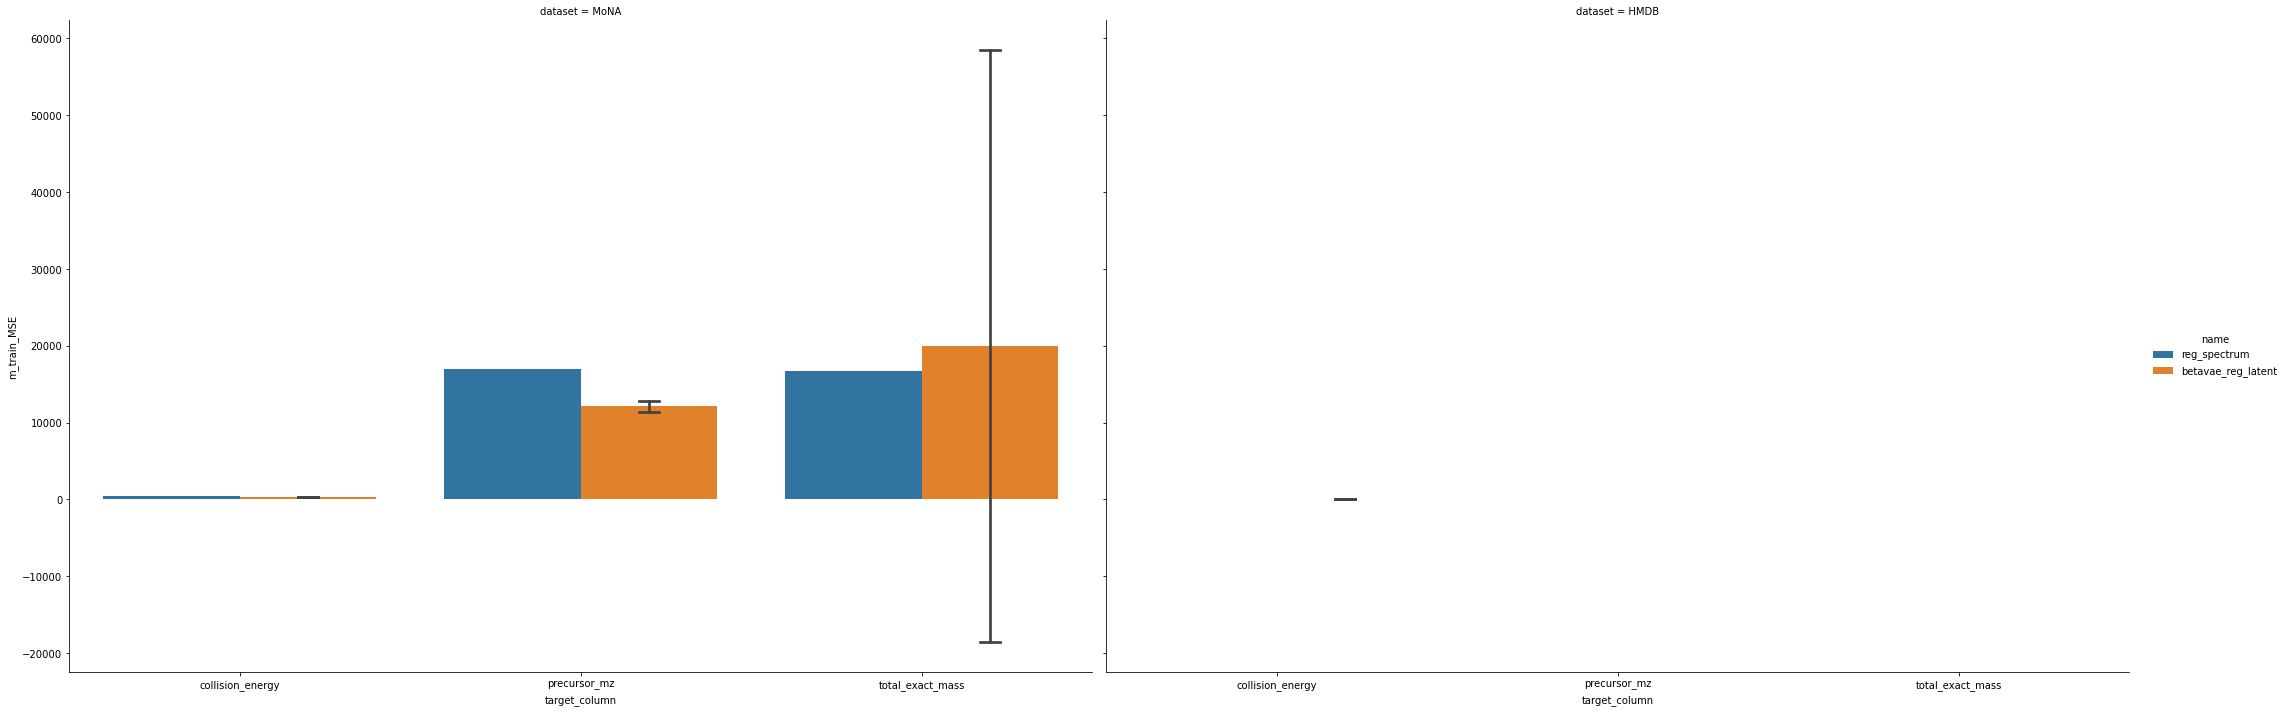

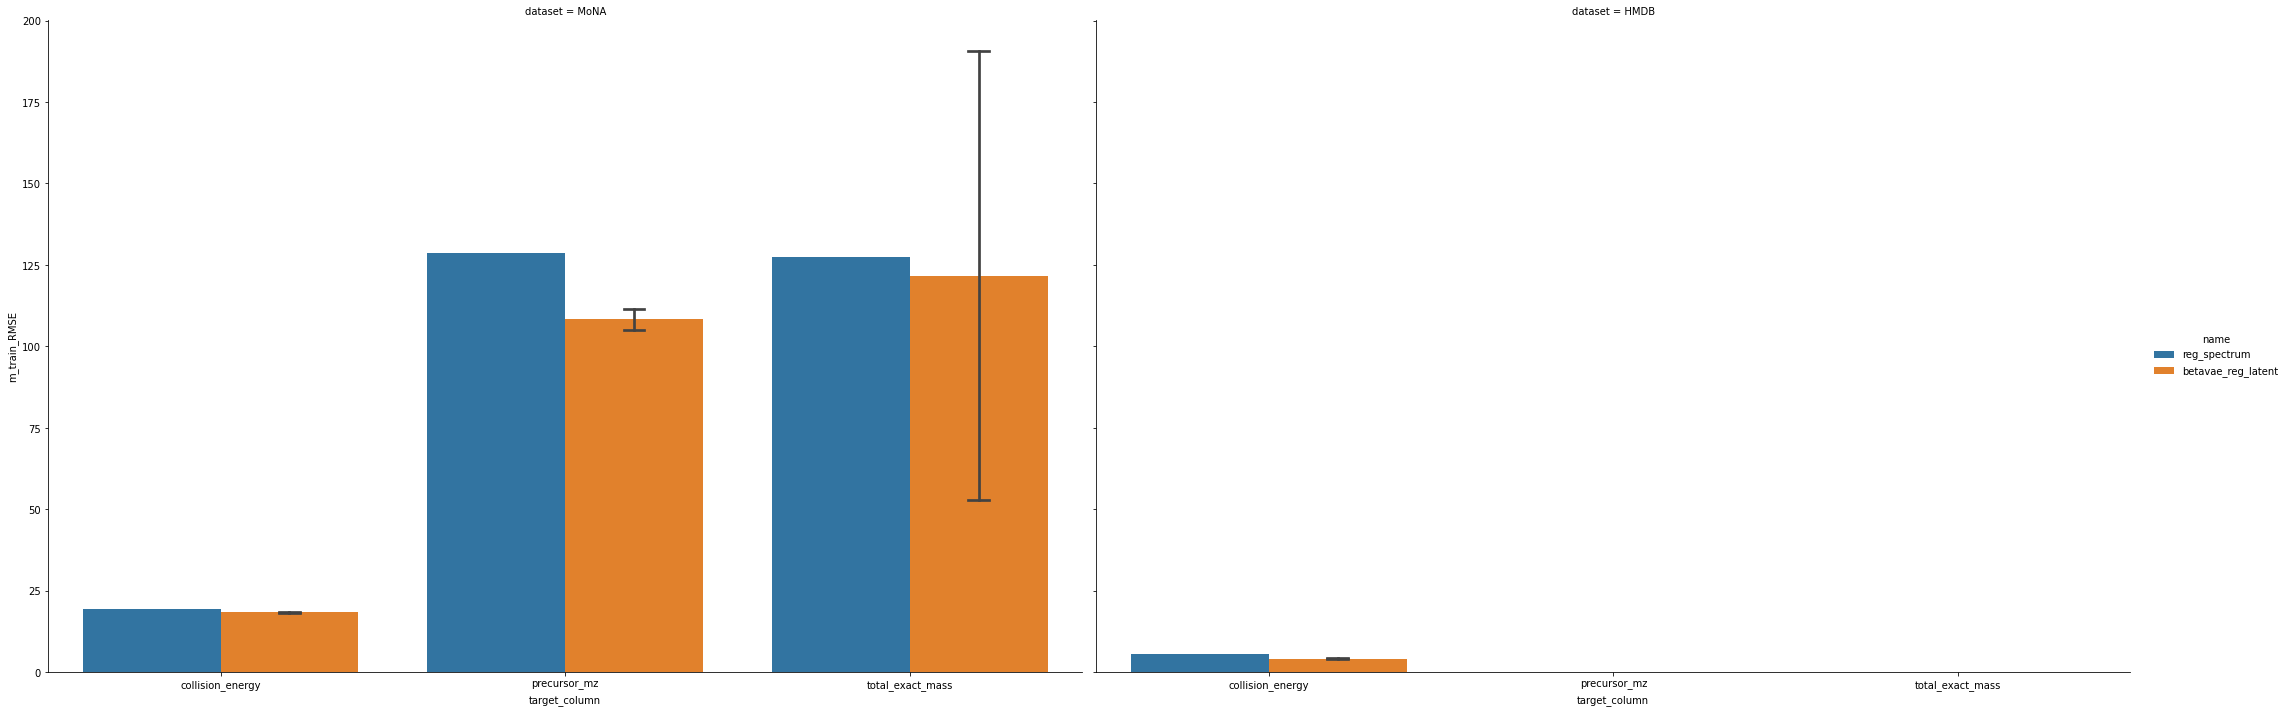

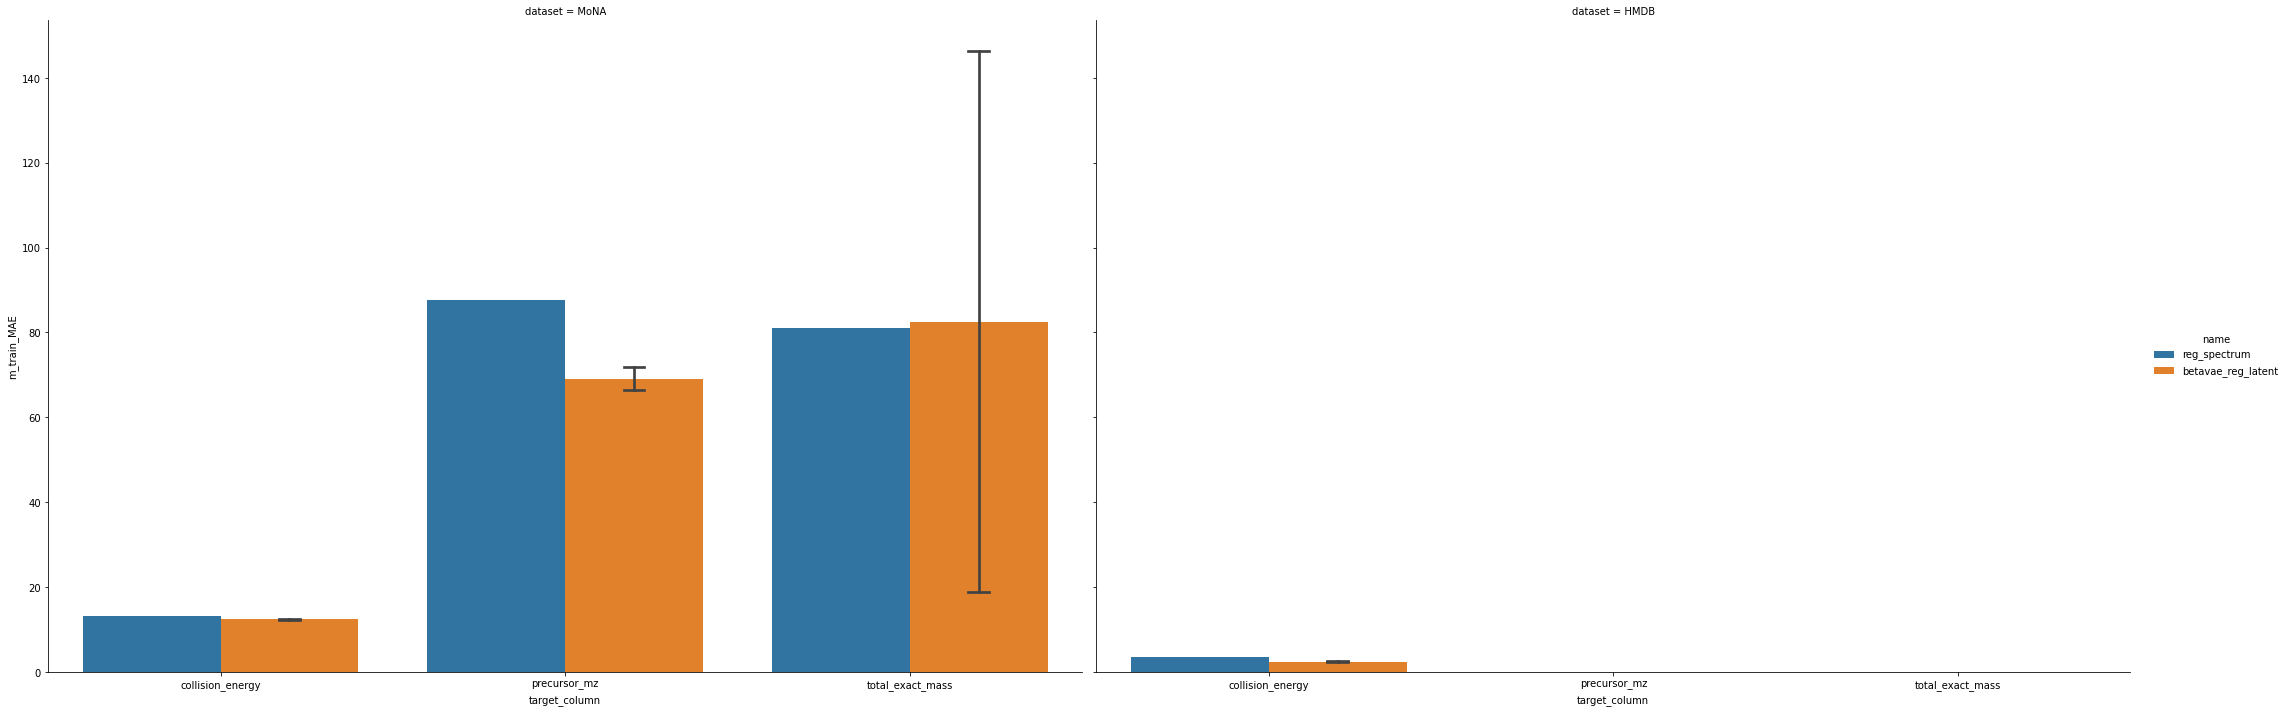

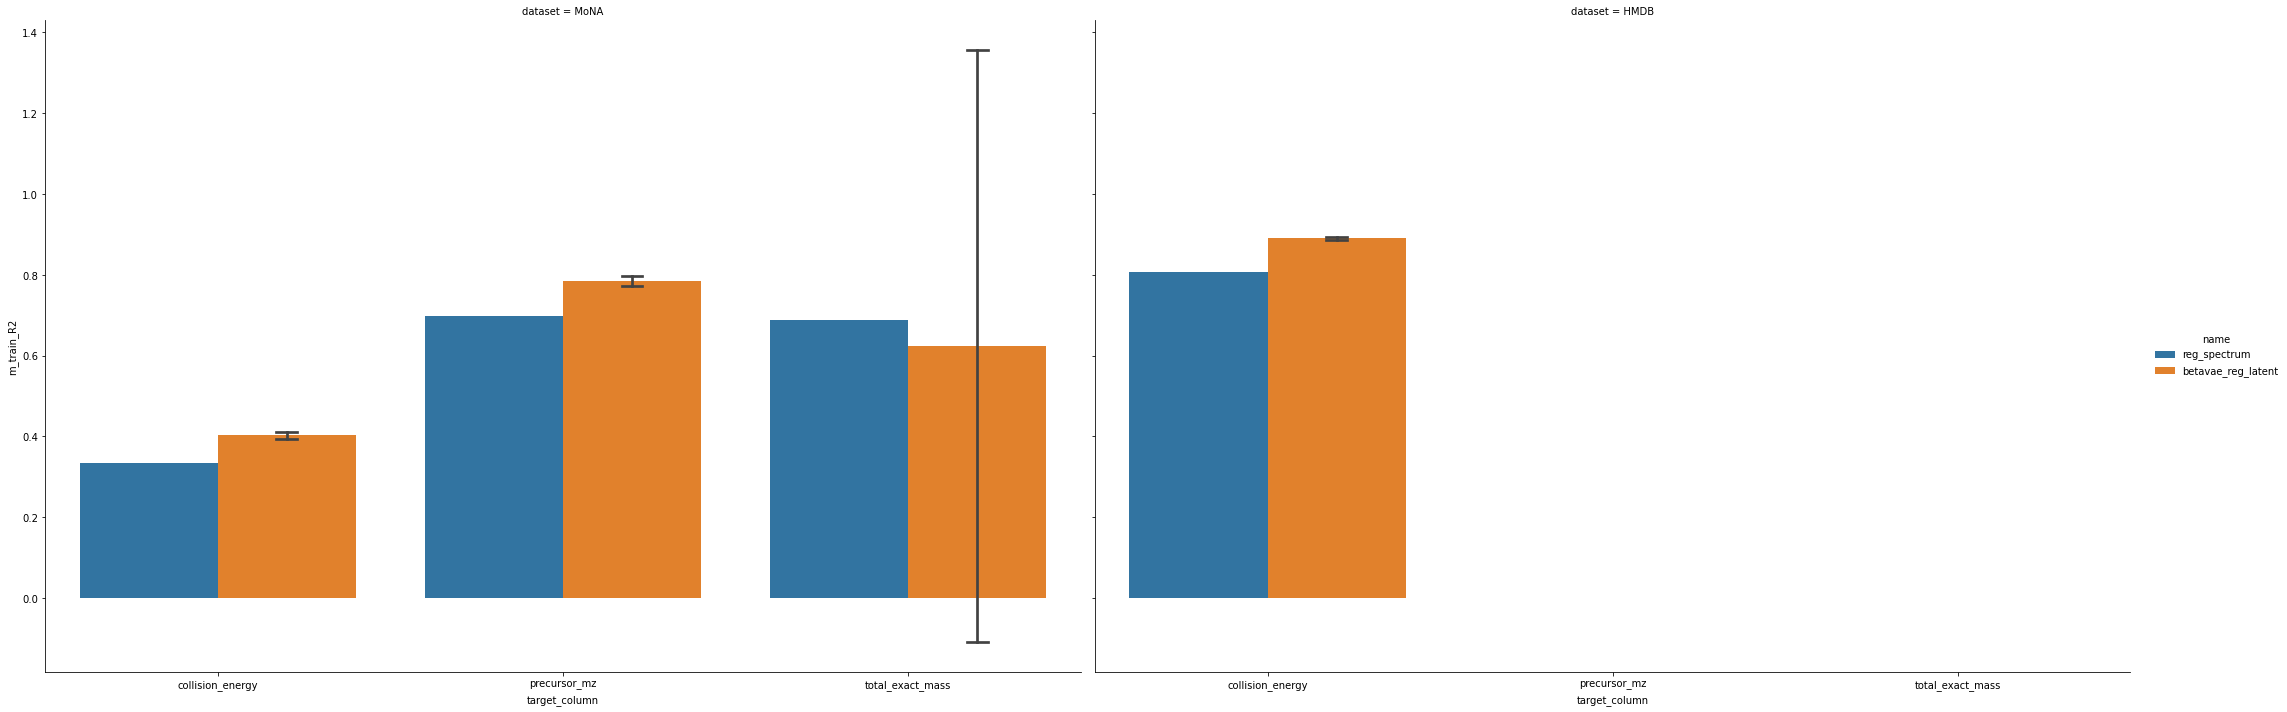

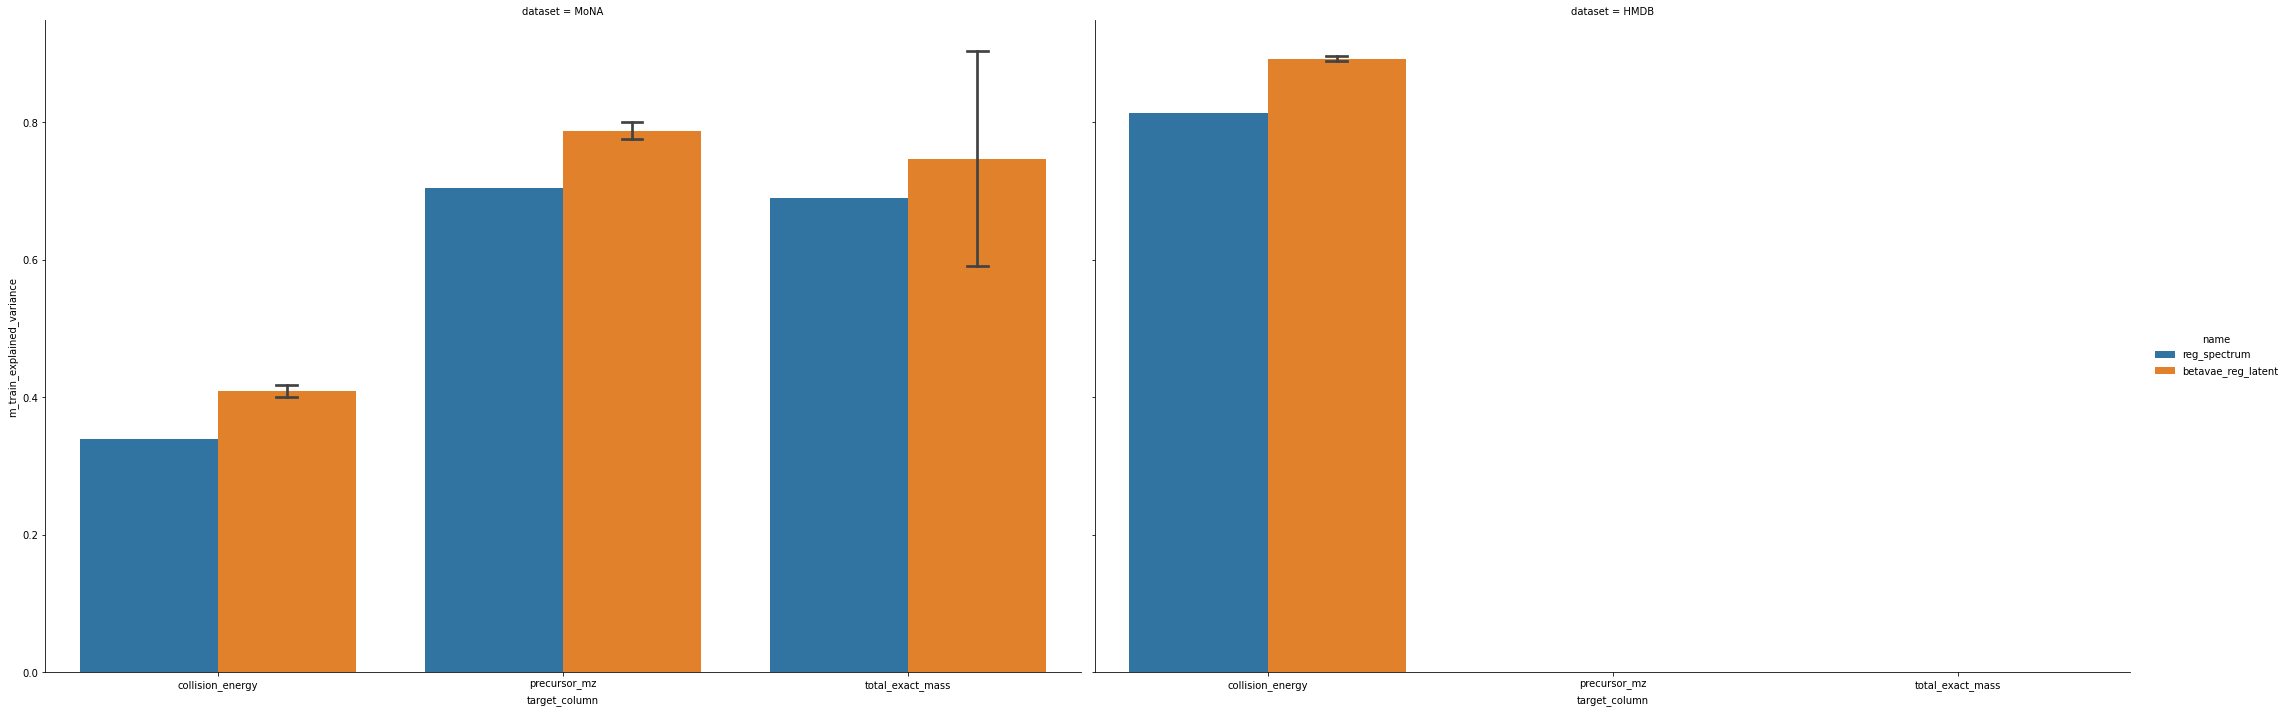

In [95]:
for column in reg_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="name", kind="bar", ci="sd", capsize=.06, height=10, aspect=1.5)

## Scores vs. beta param

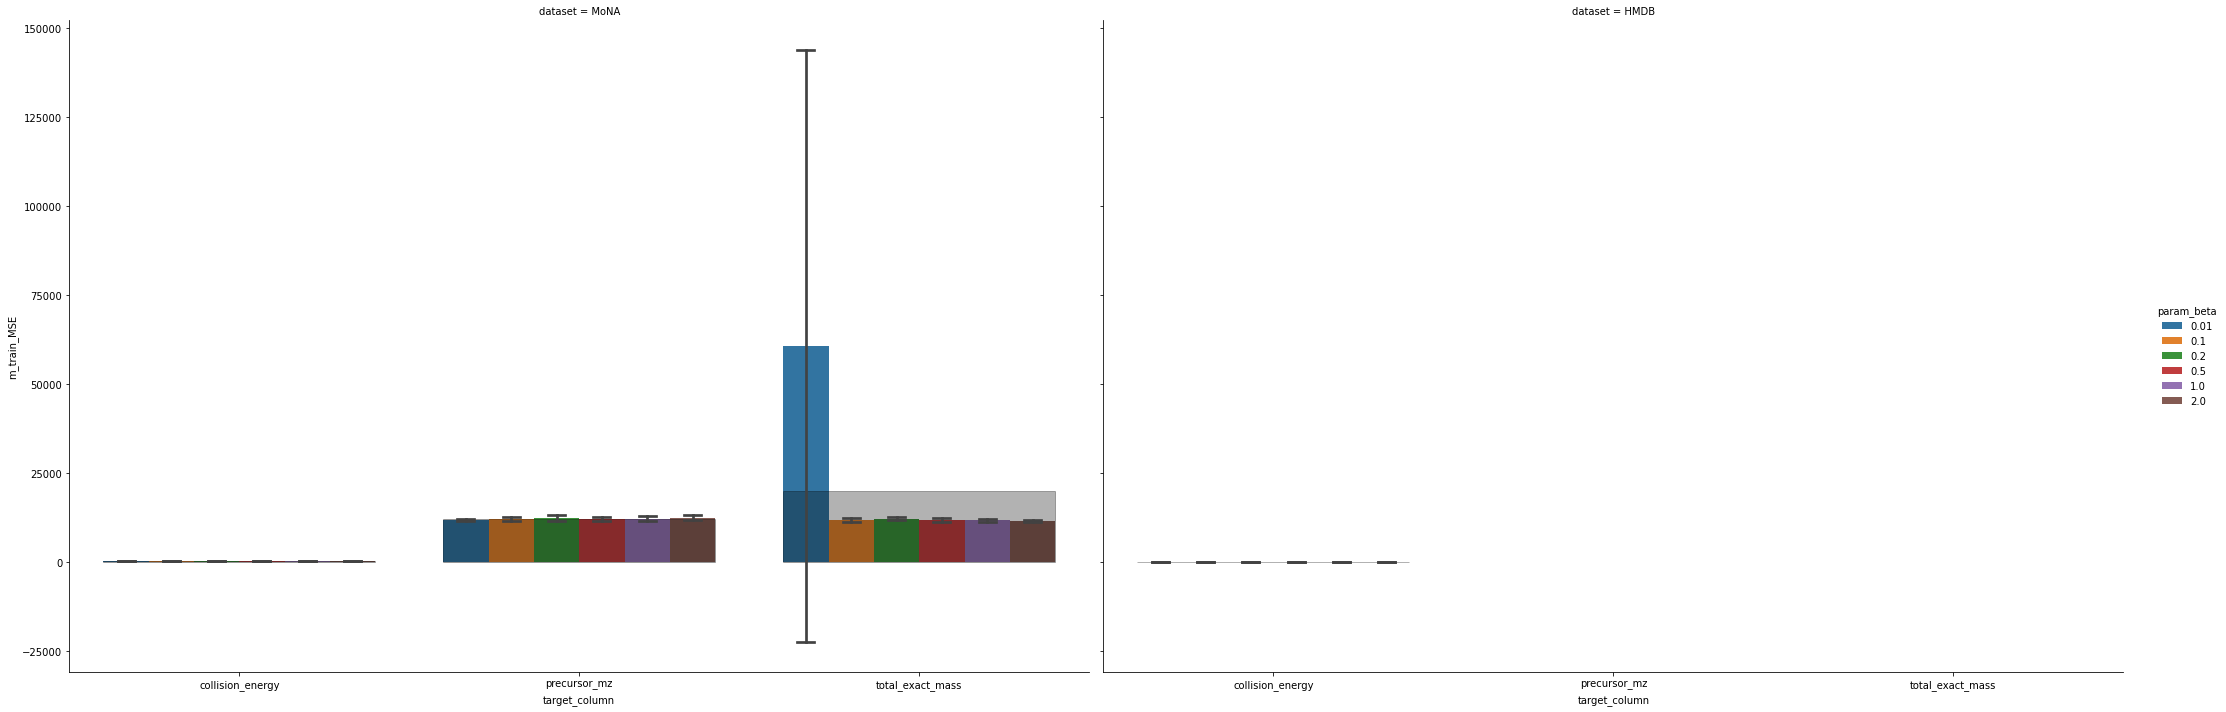

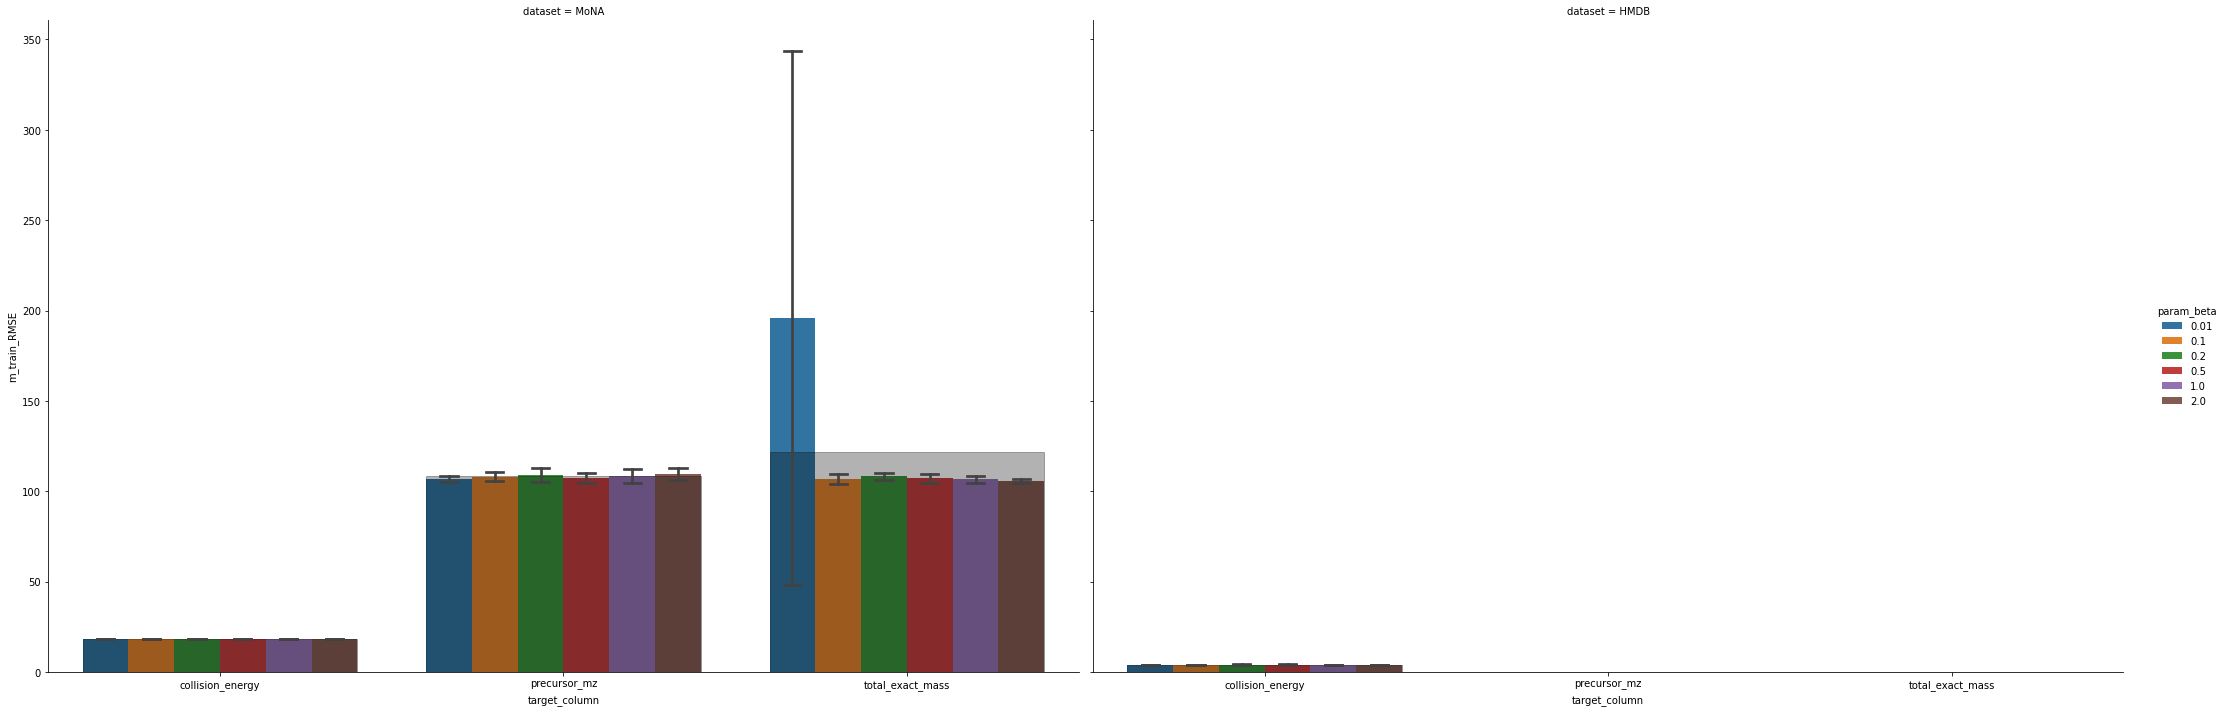

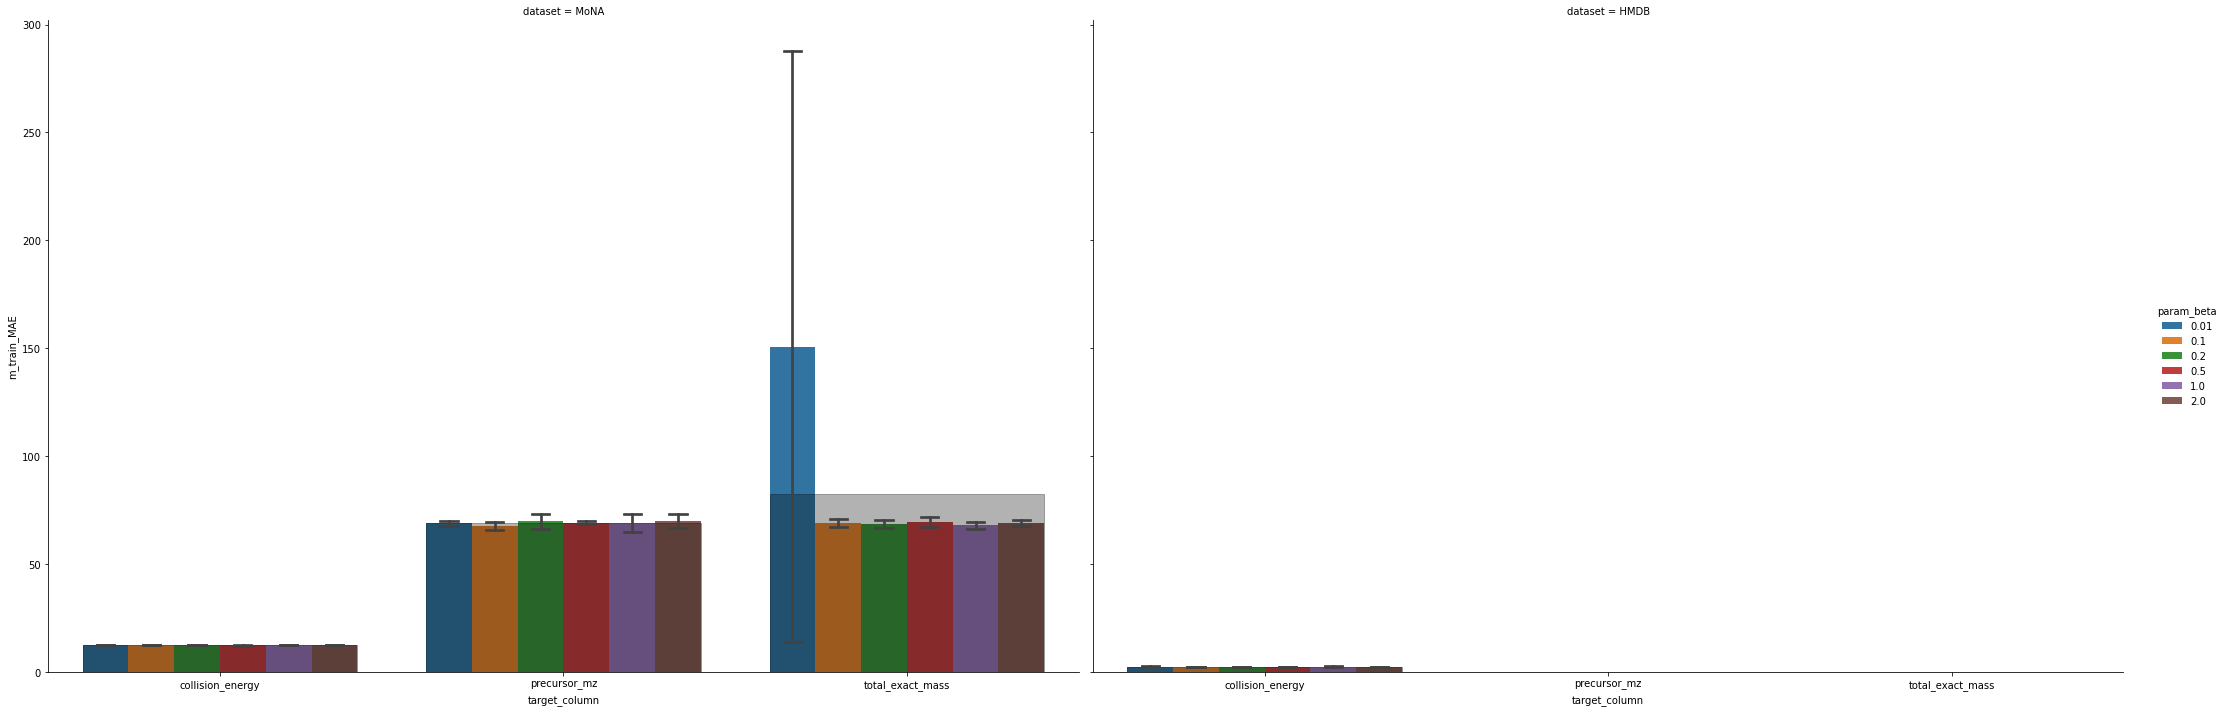

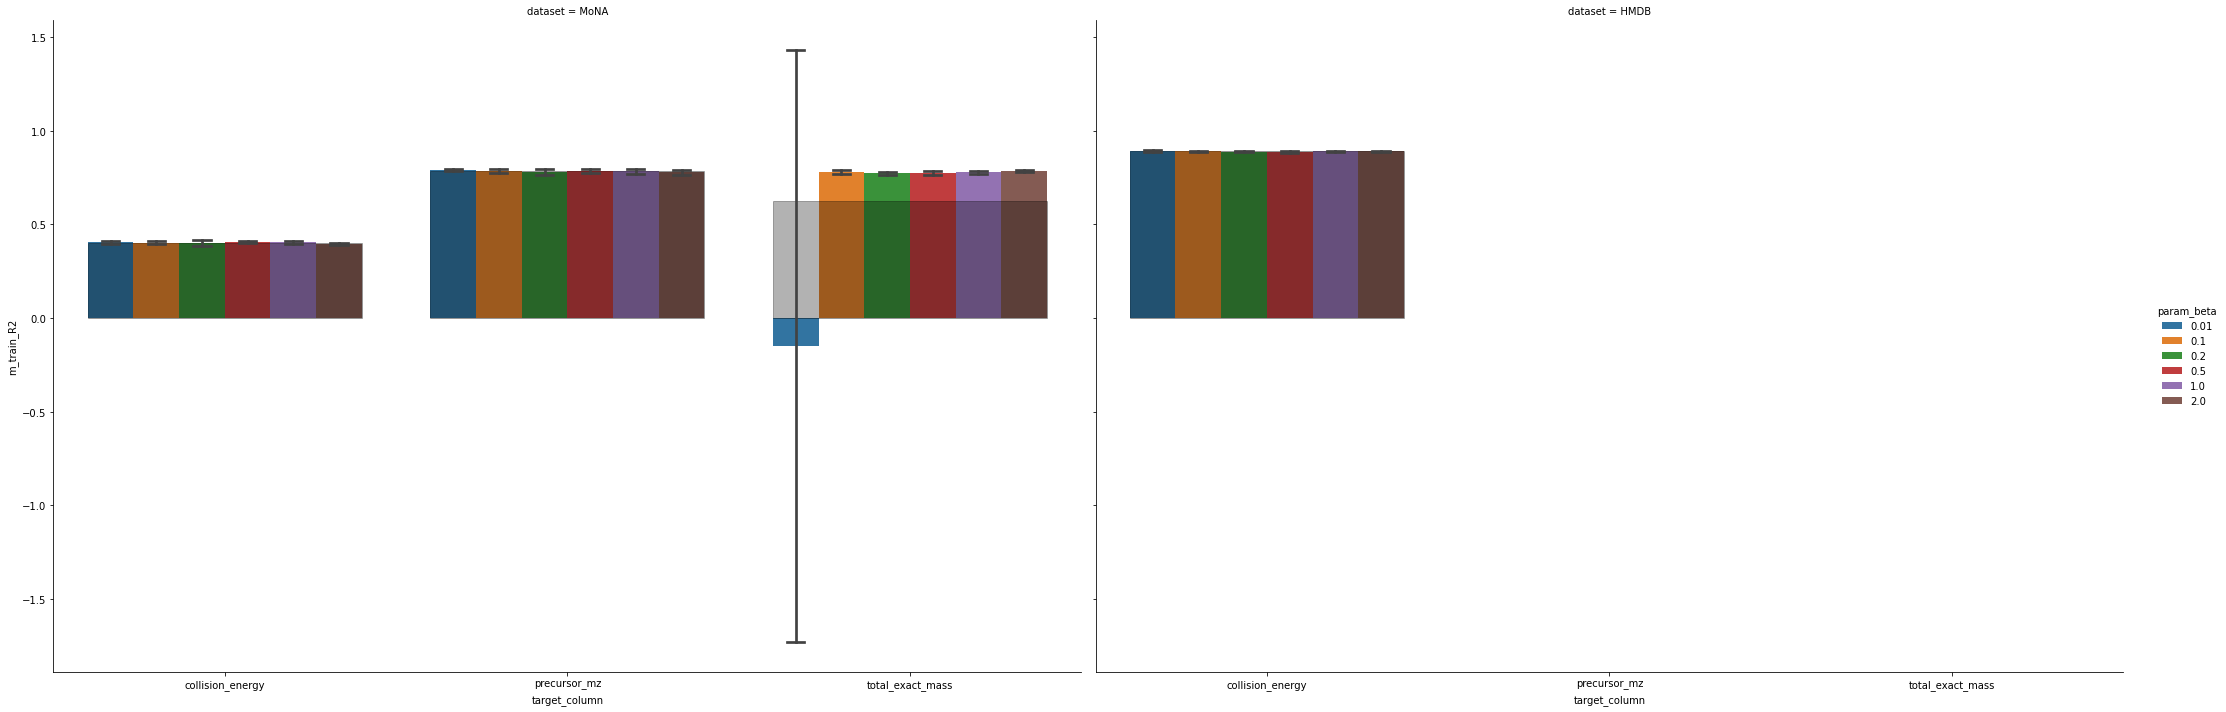

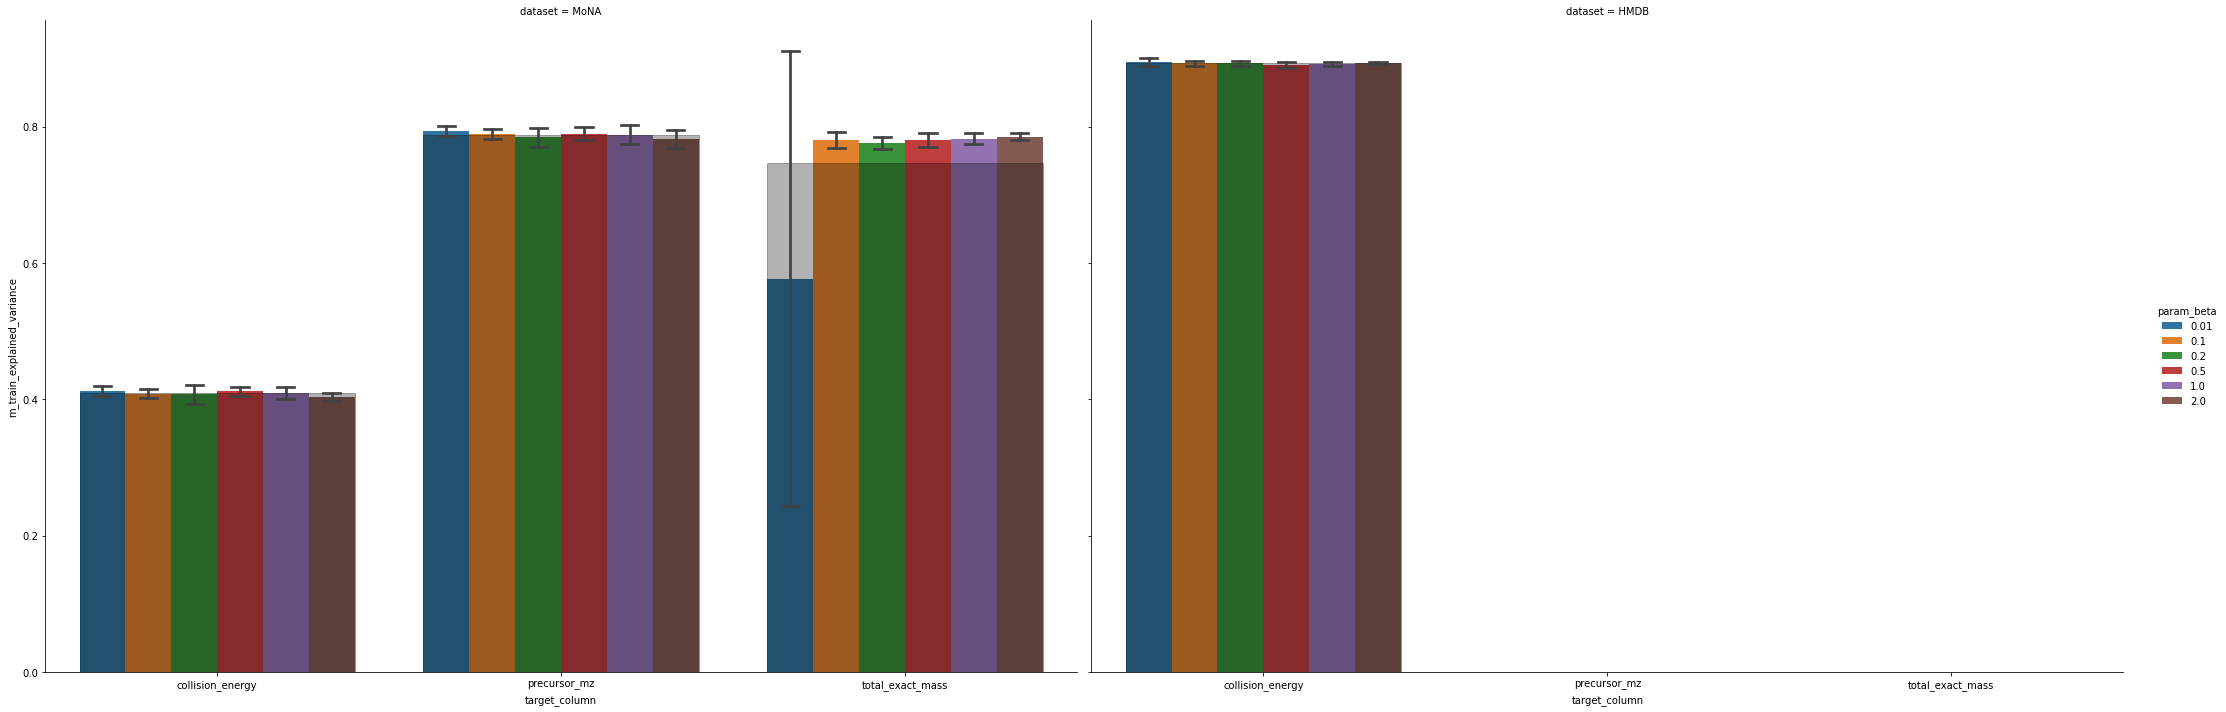

In [96]:
for column in reg_scores:
    ax = sns.catplot(data=df[df['name'] == 'betavae_reg_latent'], x="target_column", y=column, col='dataset',
        hue="param_beta", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    ax.map(sns.barplot, 'target_column', column, data=df[df['name'] == 'reg_spectrum'], 
        order=df['target_column'].unique().tolist(), alpha=0.3, linewidth=1., color='black', edgecolor="black", ci=None)

## Scores vs. latent dimension

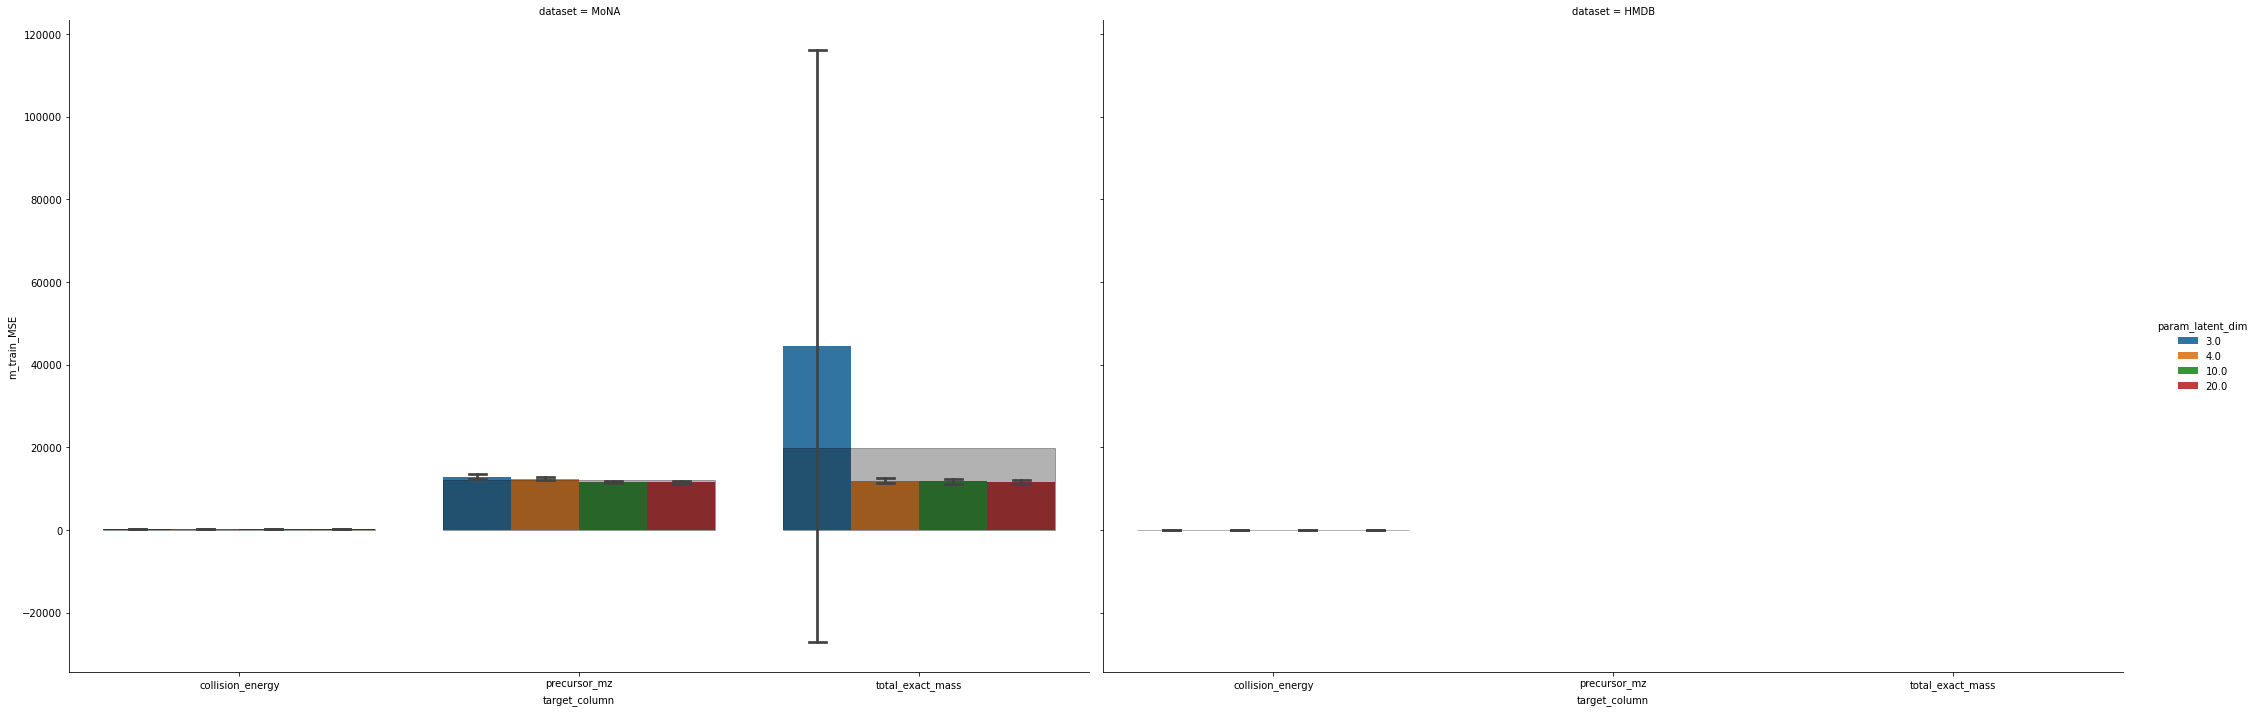

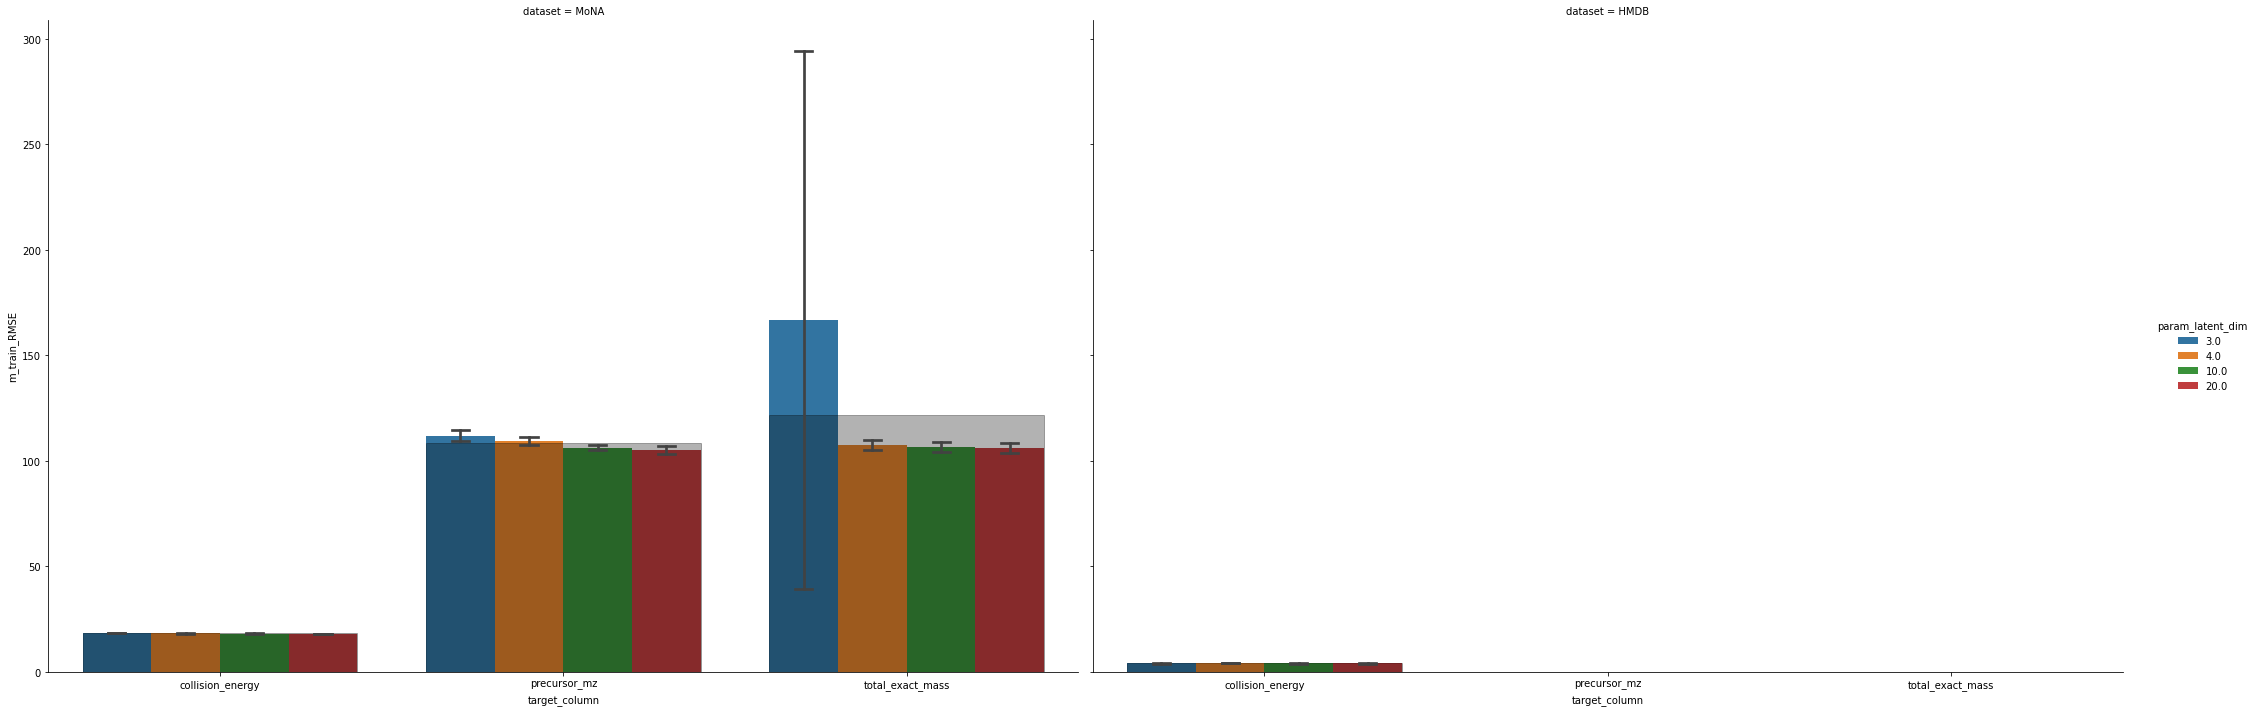

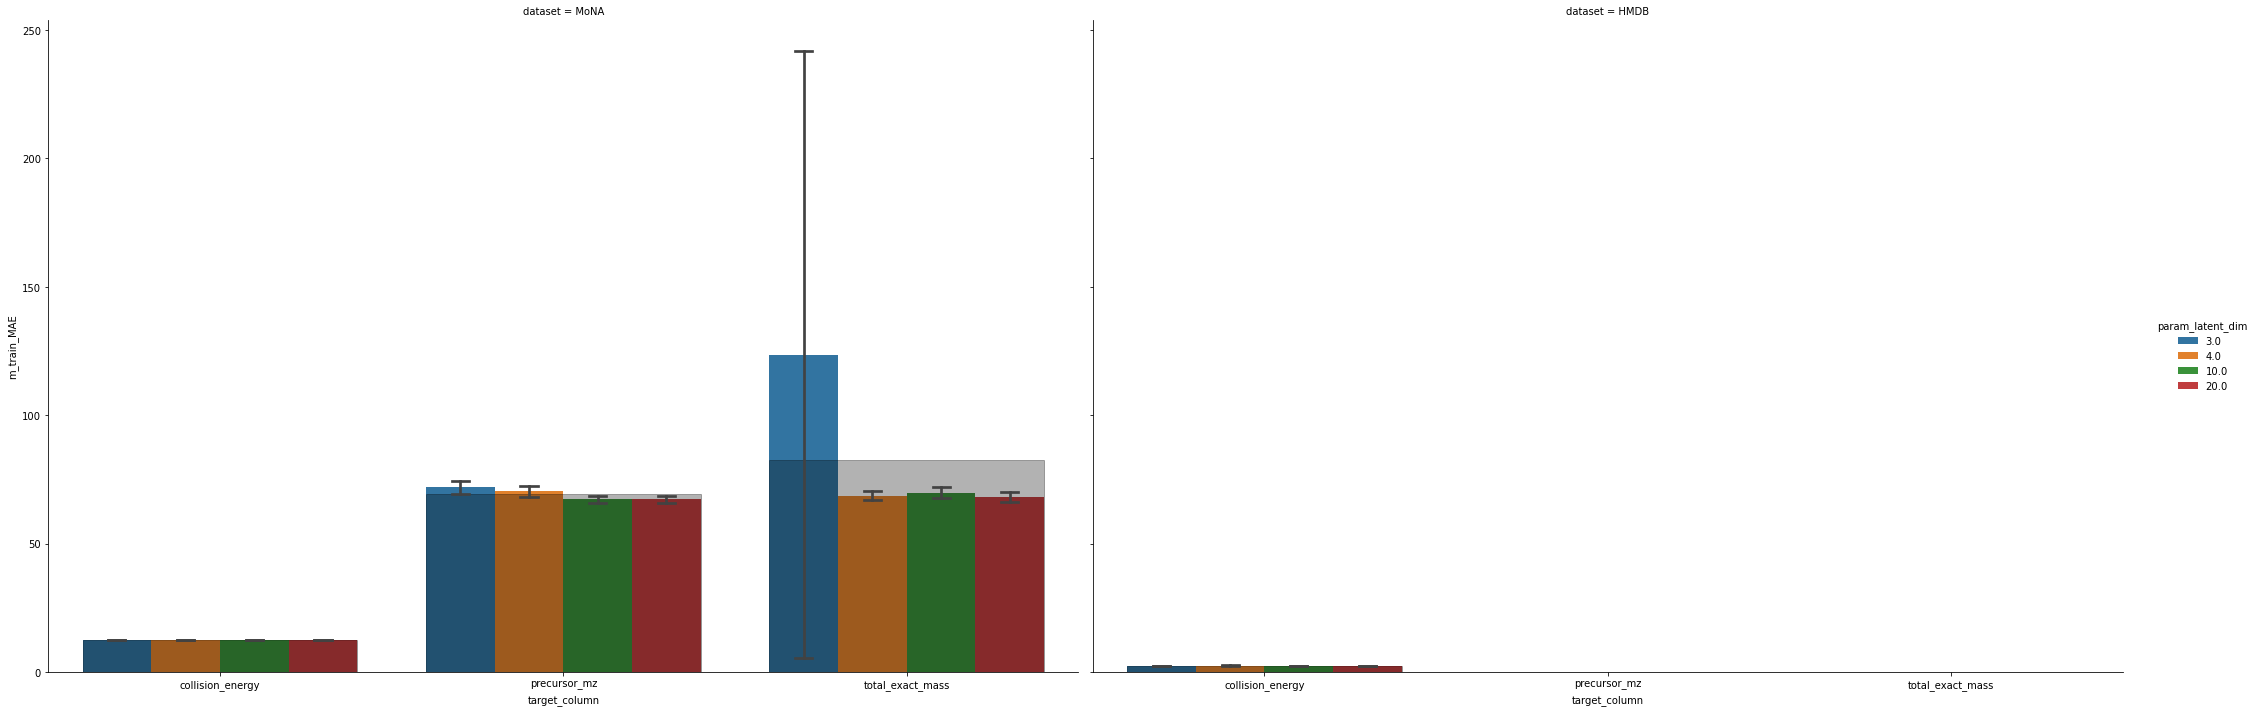

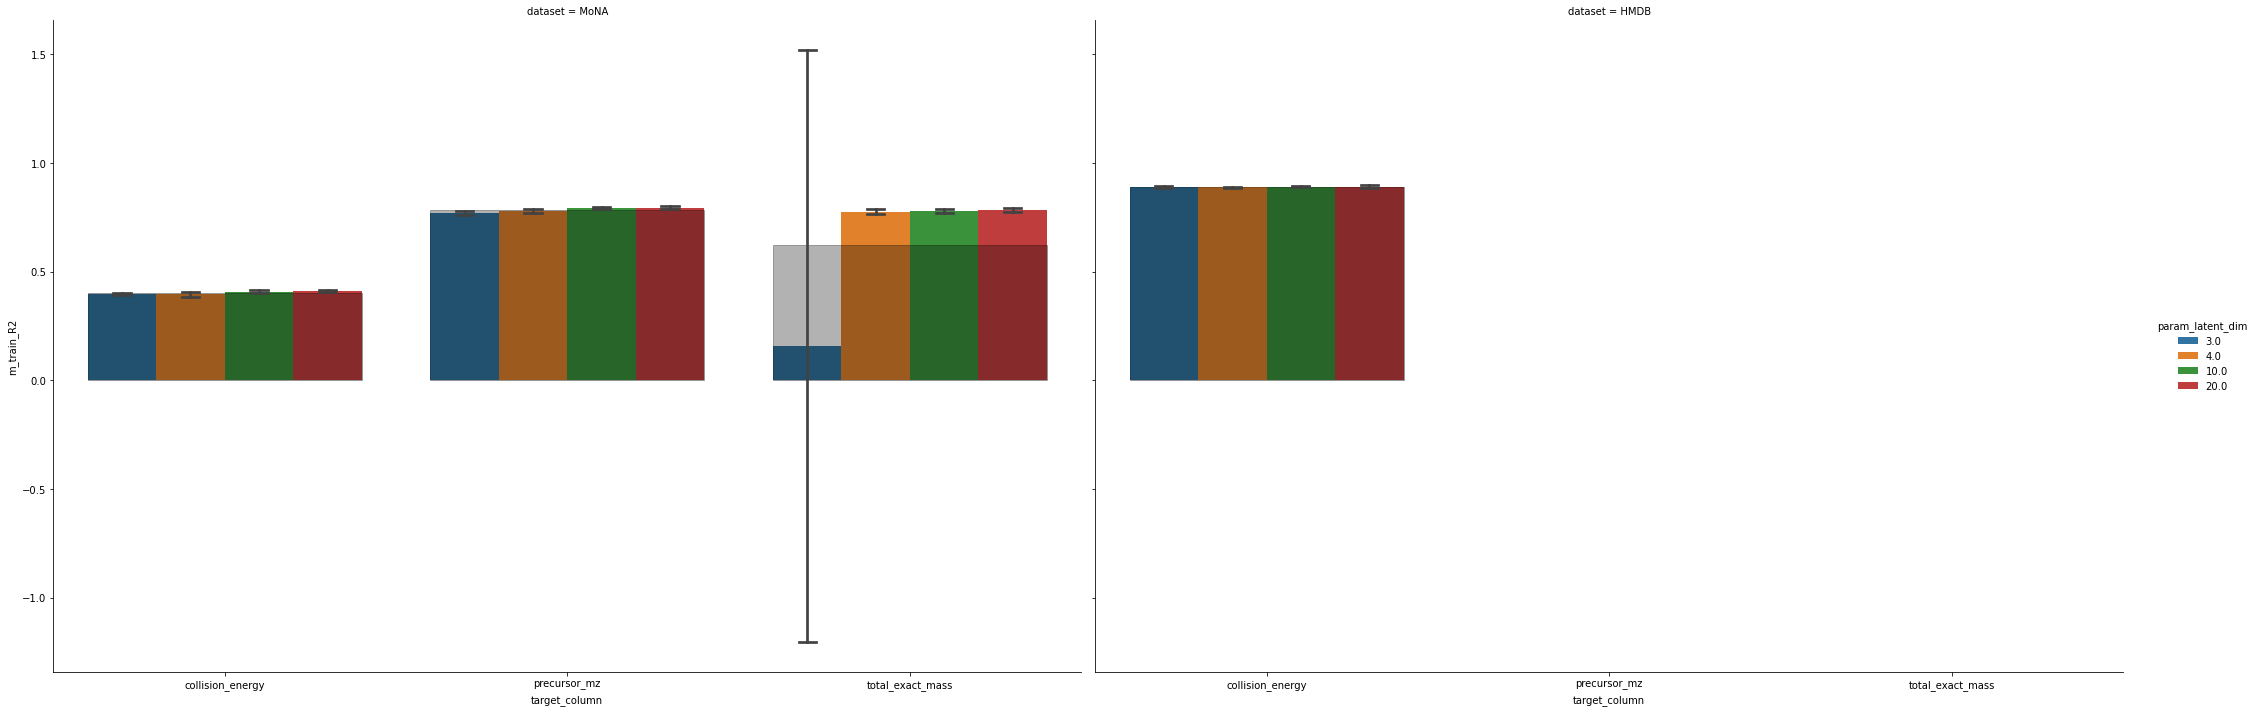

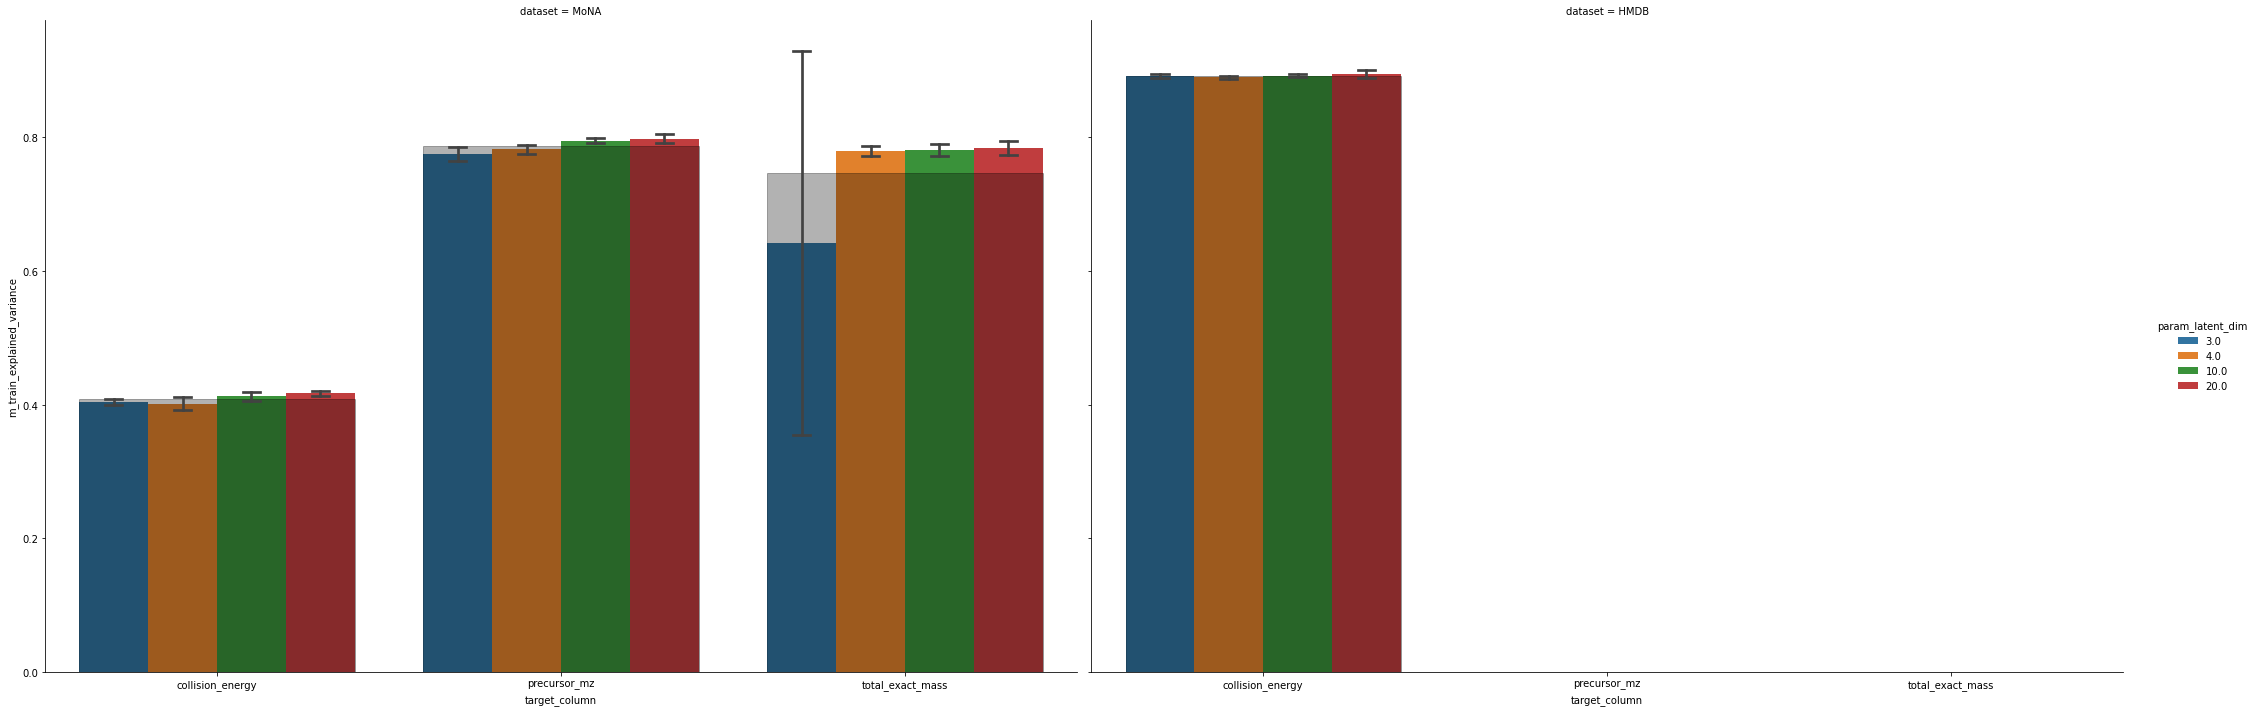

In [97]:
for column in reg_scores:
    ax = sns.catplot(data=df[df['name'] == 'betavae_reg_latent'], x="target_column", y=column, col='dataset',
        hue="param_latent_dim", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    ax.map(sns.barplot, 'target_column', column, data=df[df['name'] == 'reg_spectrum'], 
        order=df['target_column'].unique().tolist(), alpha=0.3, linewidth=1., color='black', edgecolor="black", ci=None)

## Selected models

In [98]:
dataset = 'MoNA'

In [99]:
df_1 = df[(df['name'] == 'betavae_reg_latent') & \
            (df['dataset'] == dataset) & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False) & \
            (df['param_latent_dim'] == 20) & \
            (df['param_beta'] == 0.01)]
df_2 = df[(df['name'] == 'reg_spectrum') & (df['dataset'] == dataset)]
df_ = pd.concat([df_1, df_2])

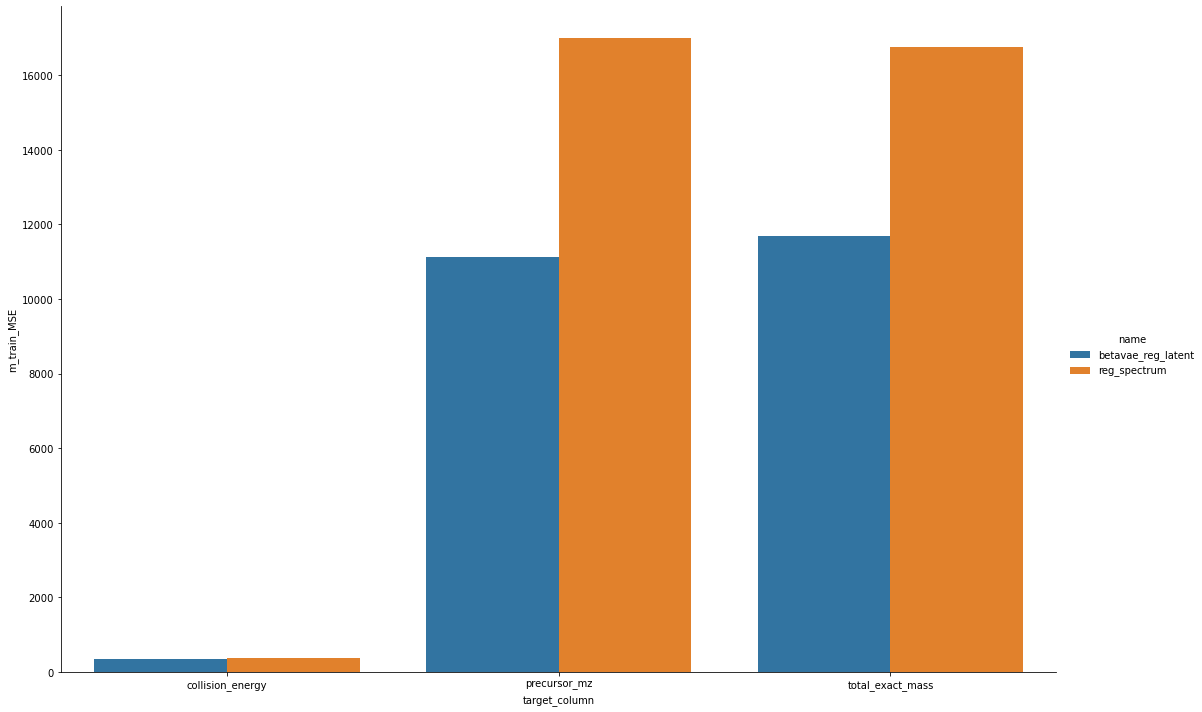

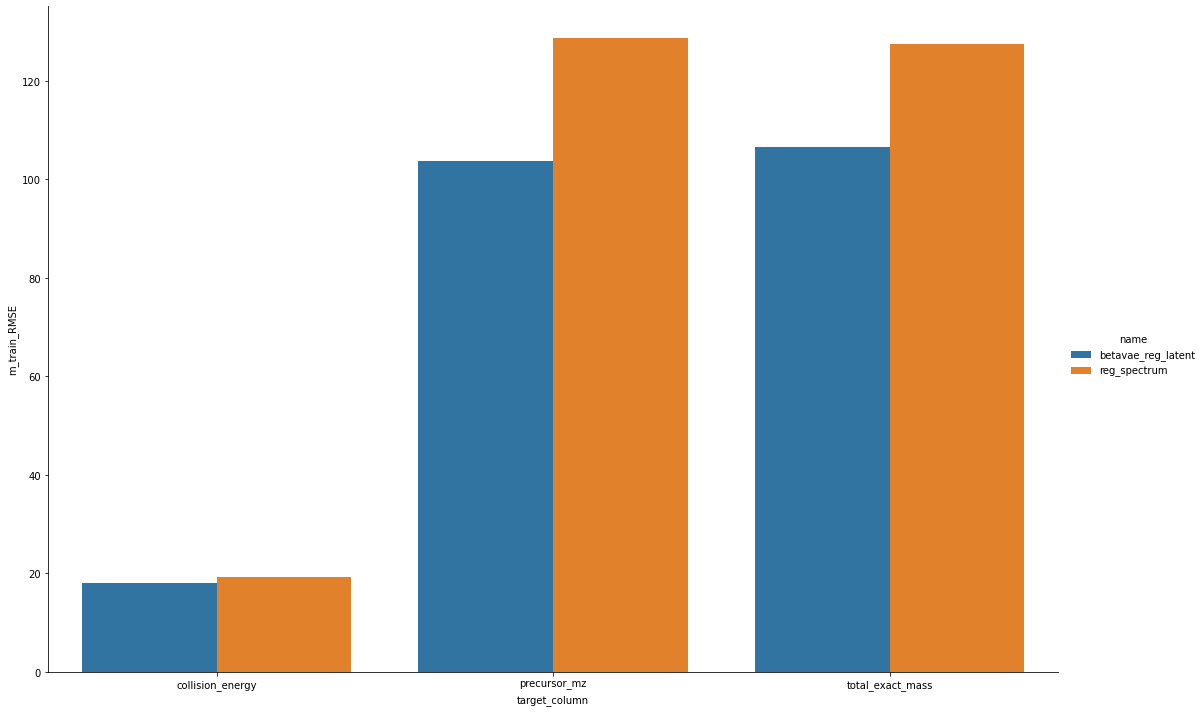

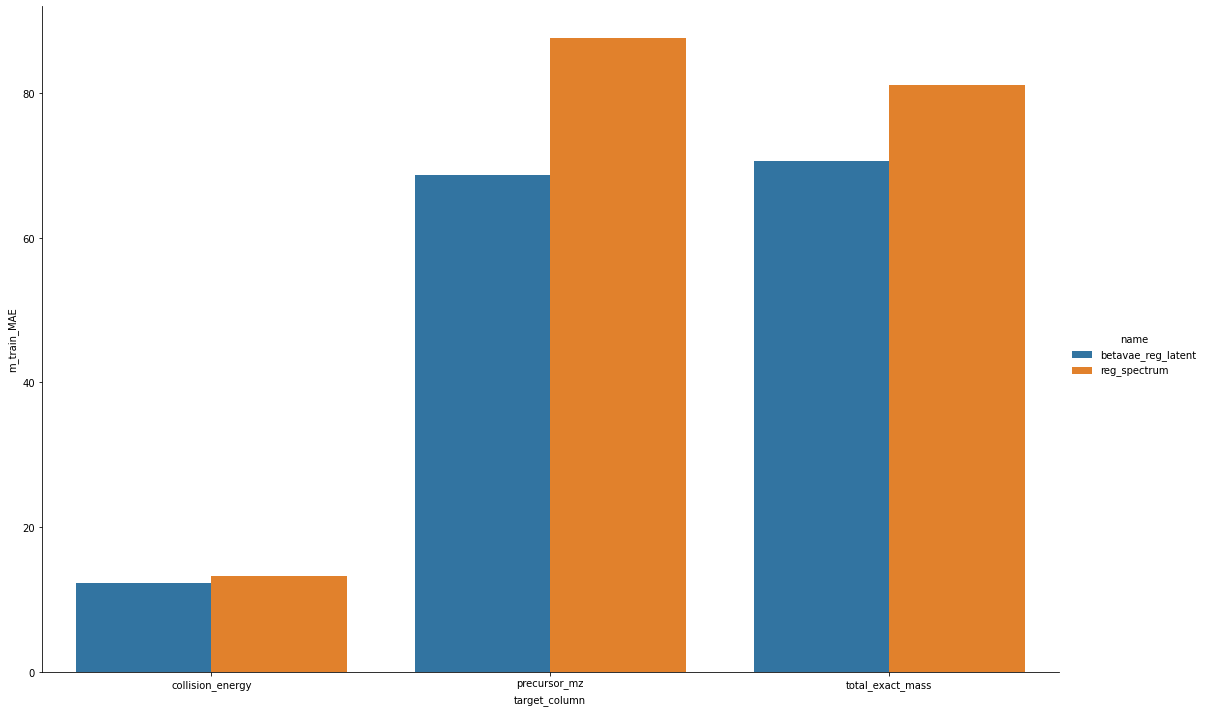

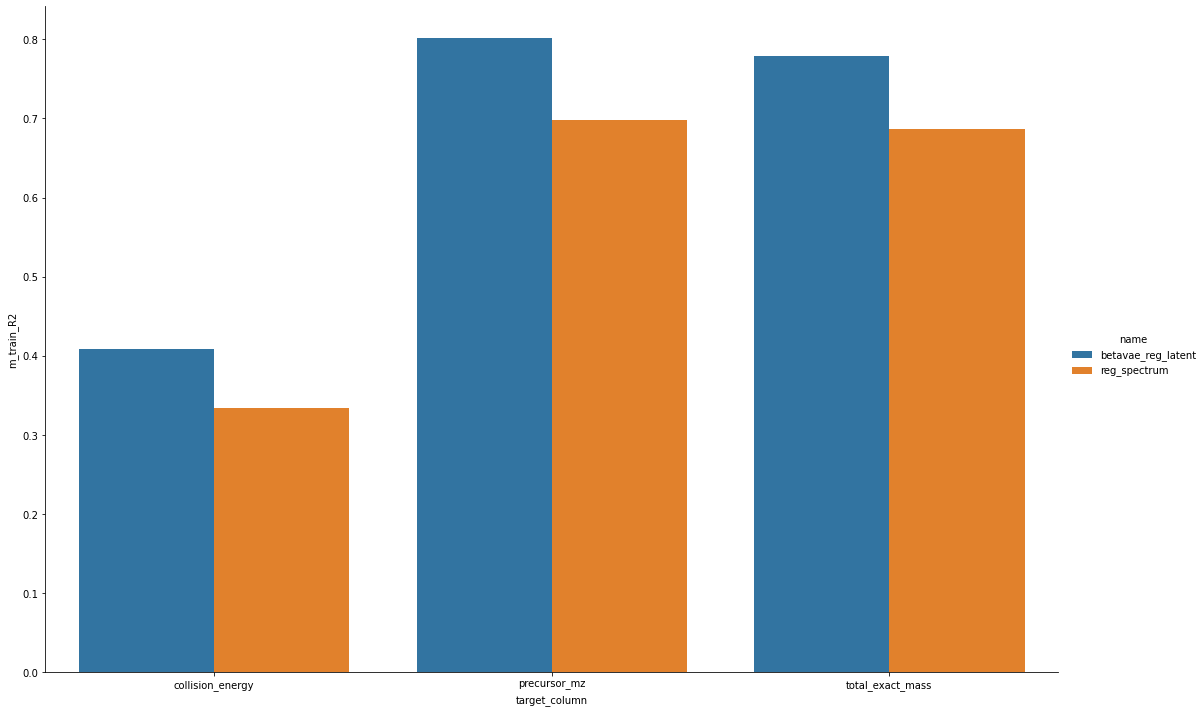

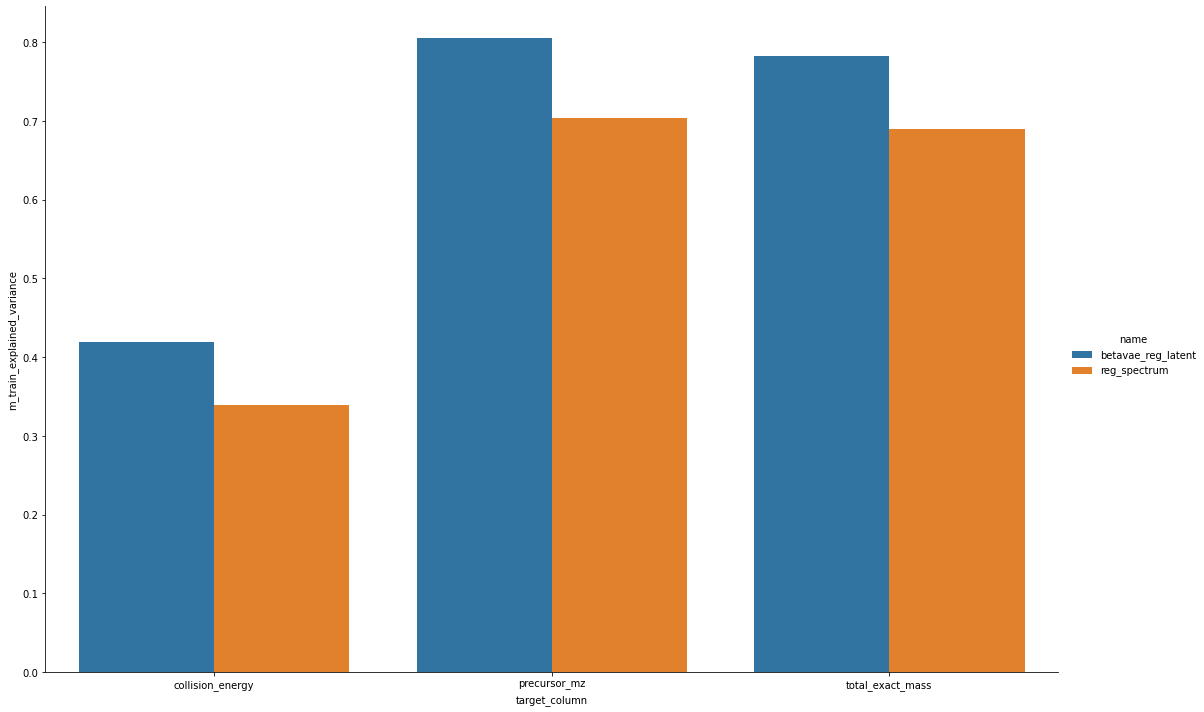

In [100]:
for column in reg_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column,
        hue="name", kind="bar", ci="sd", capsize=.06, height=10, aspect=1.5)
    plt.savefig(f'../.img/{dataset}-reg-latent-{column}.svg')
    

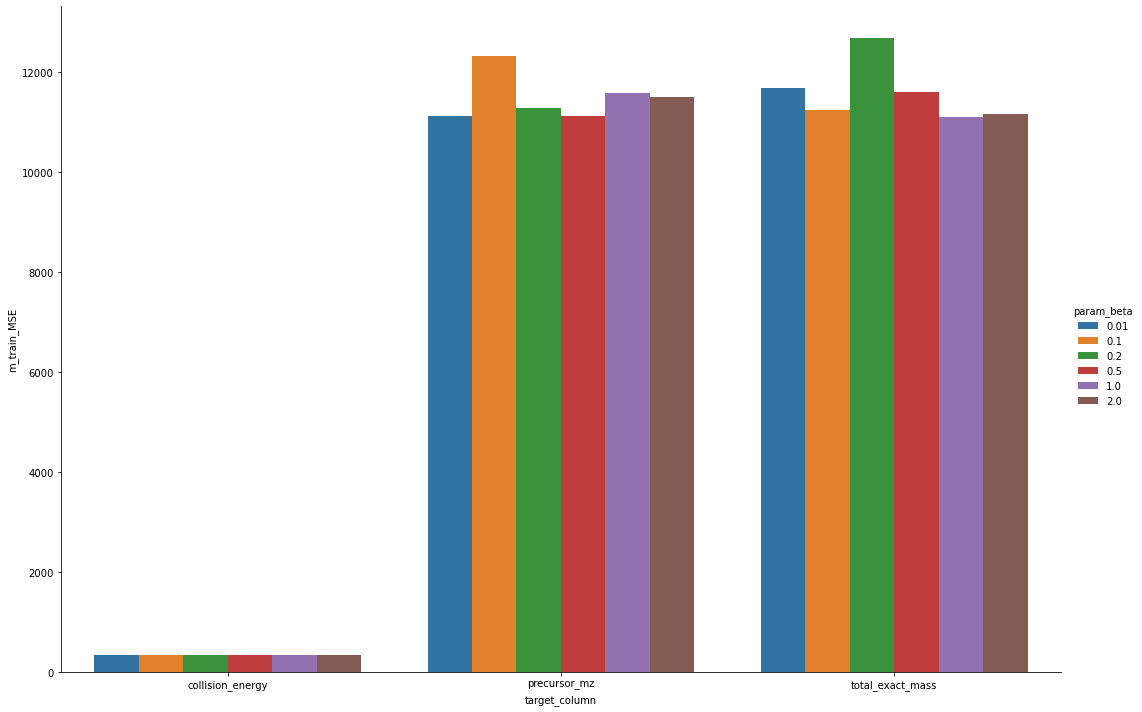

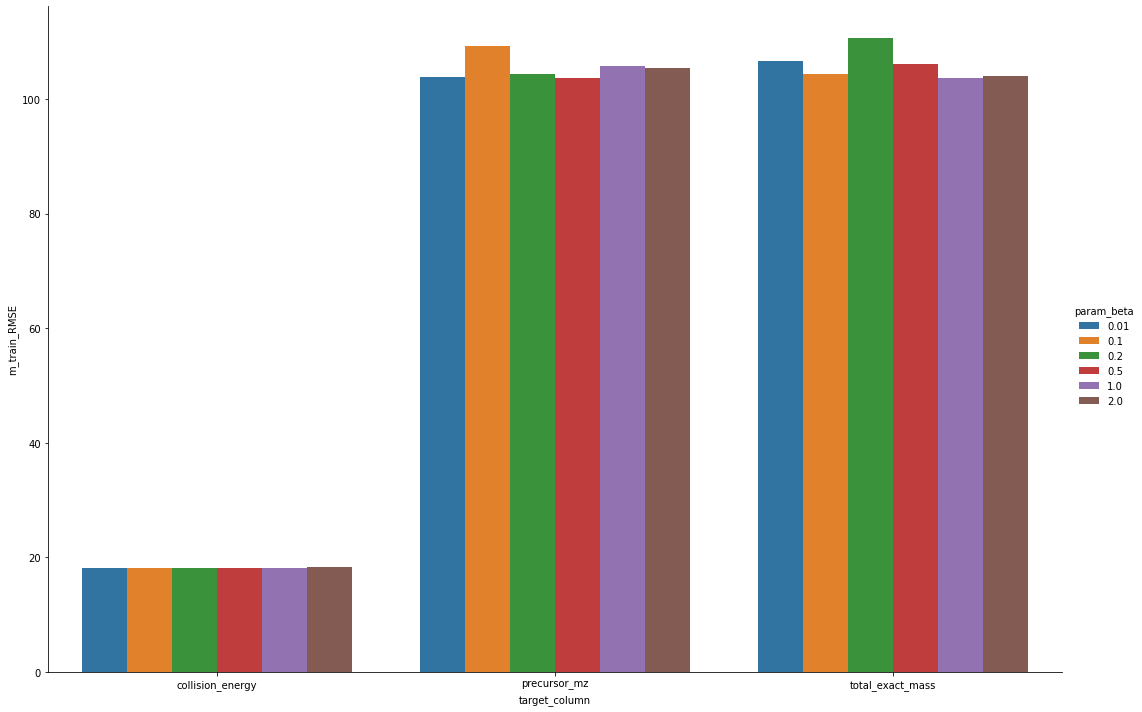

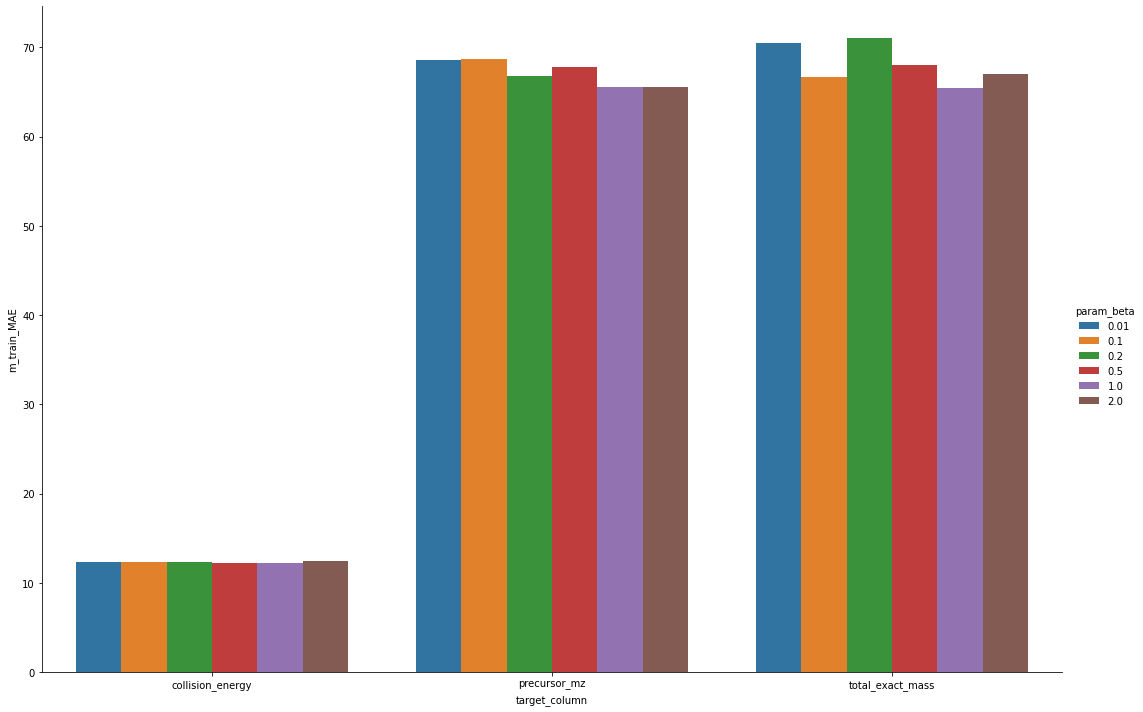

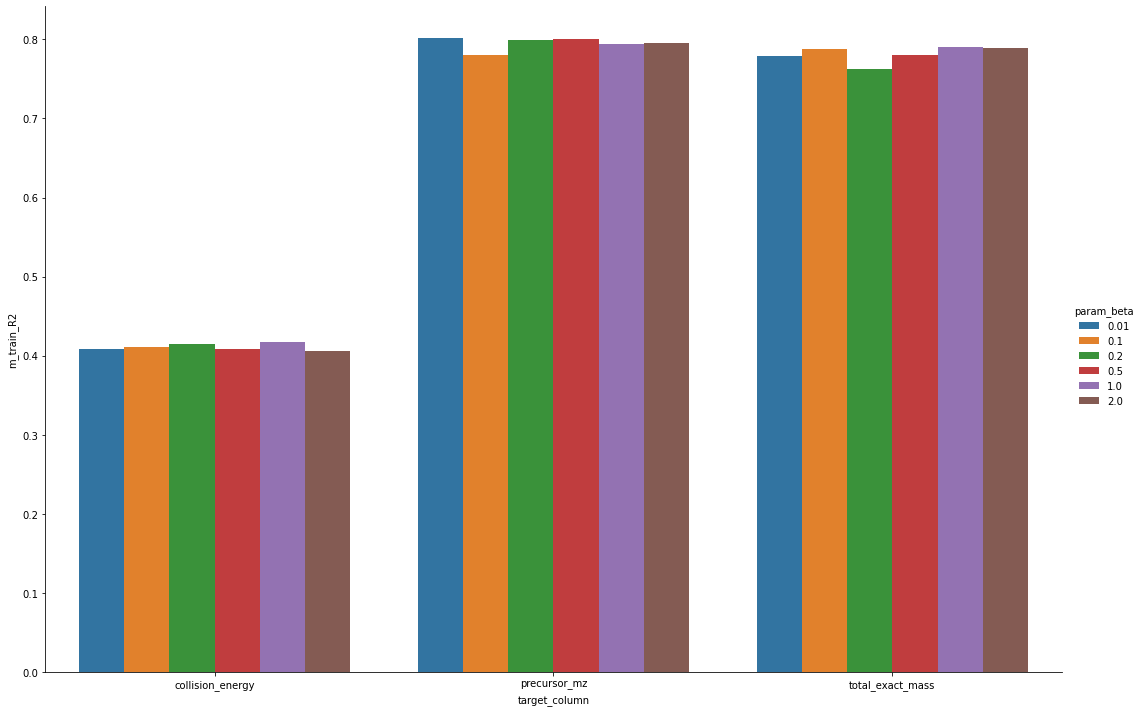

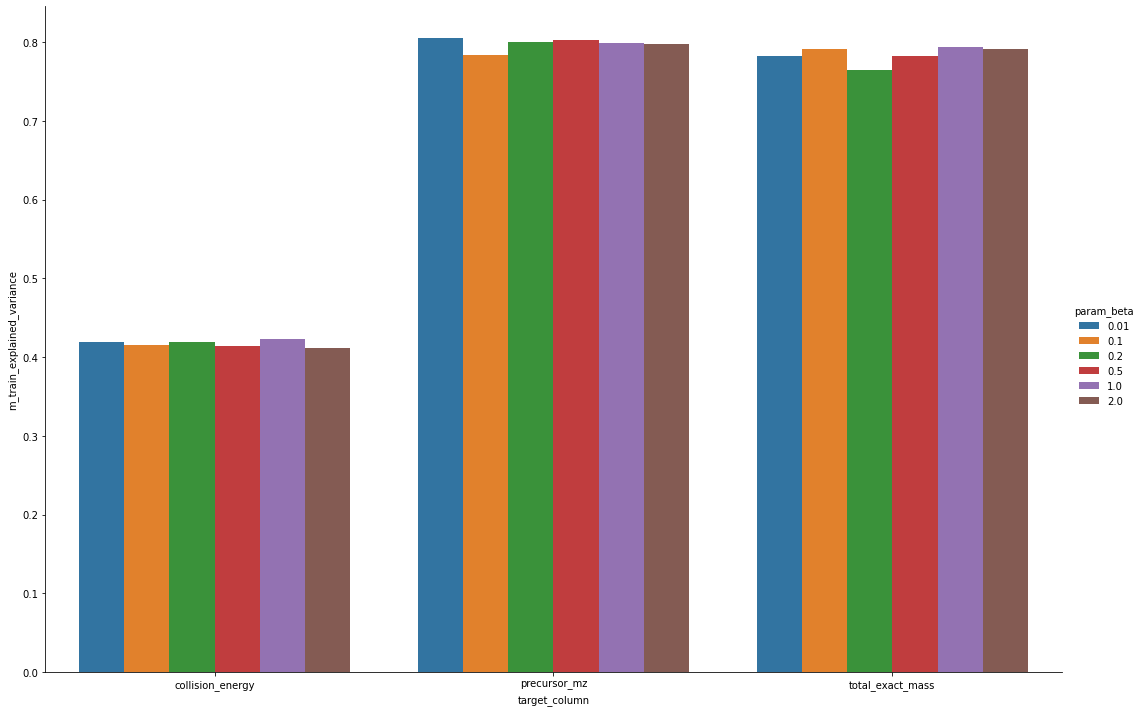

In [101]:
df_ = df[(df['name'] == 'betavae_reg_latent') & \
            (df['dataset'] == dataset) & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False) & \
            (df['param_latent_dim'] == 20)
        ]
for column in reg_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column,
            hue="param_beta", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    plt.savefig(f'../.img/{dataset}-reg-latent-beta-{column}.svg')

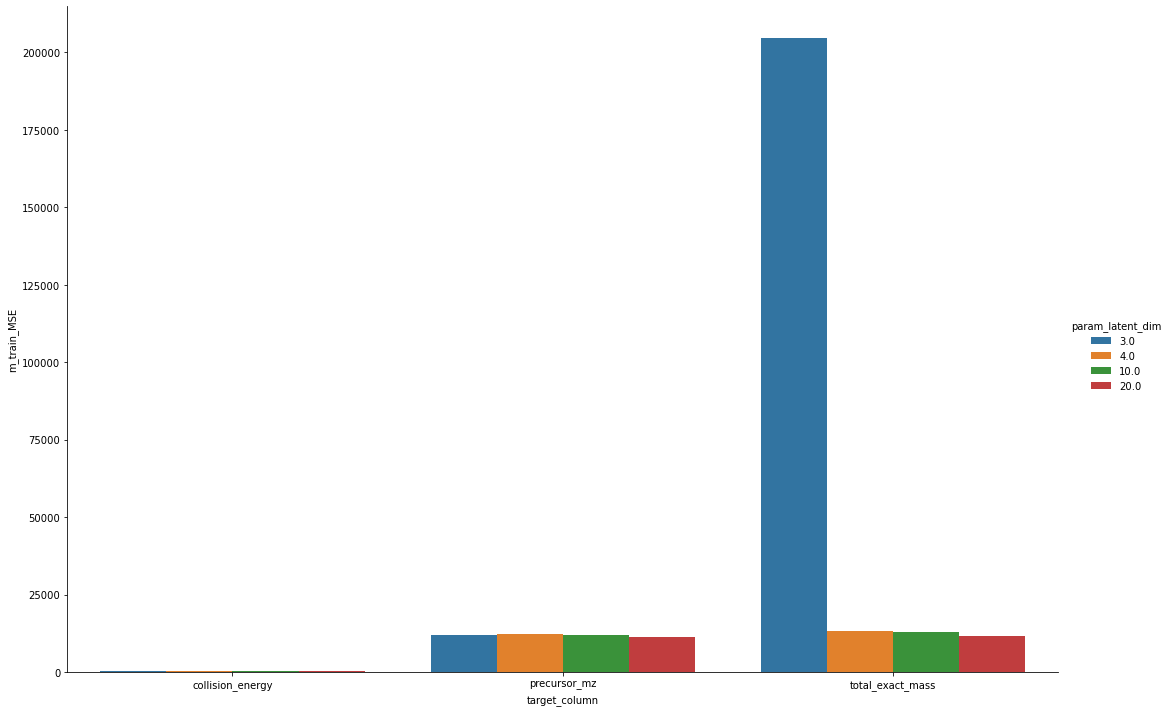

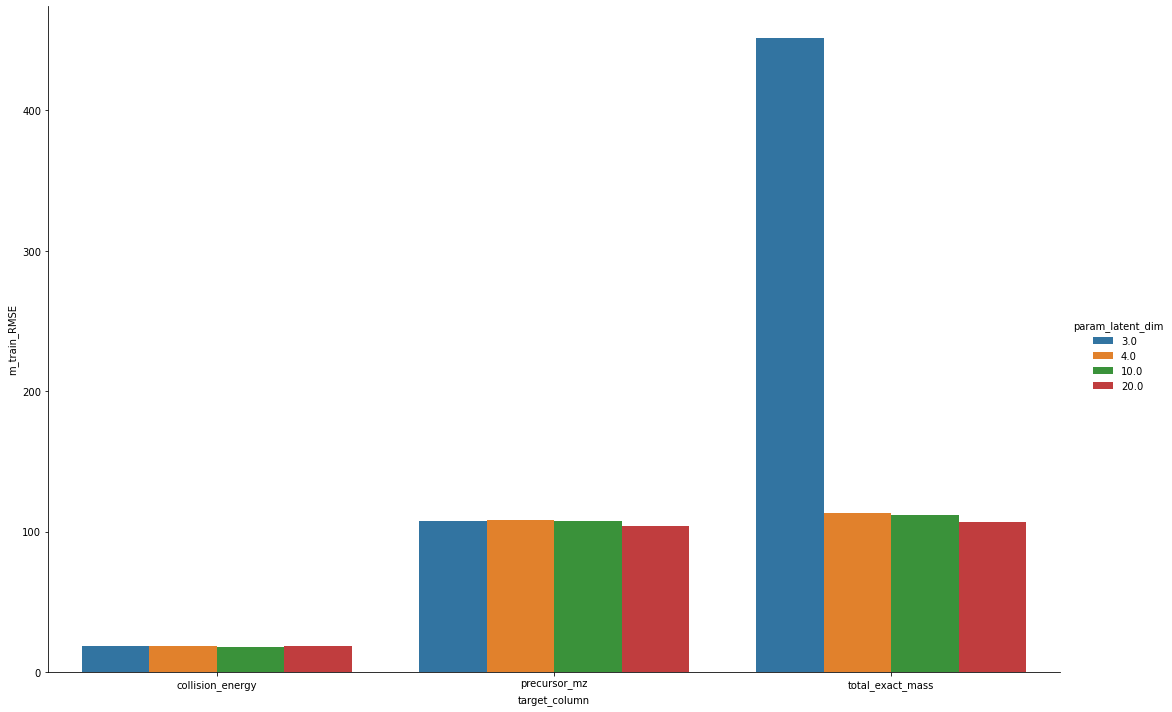

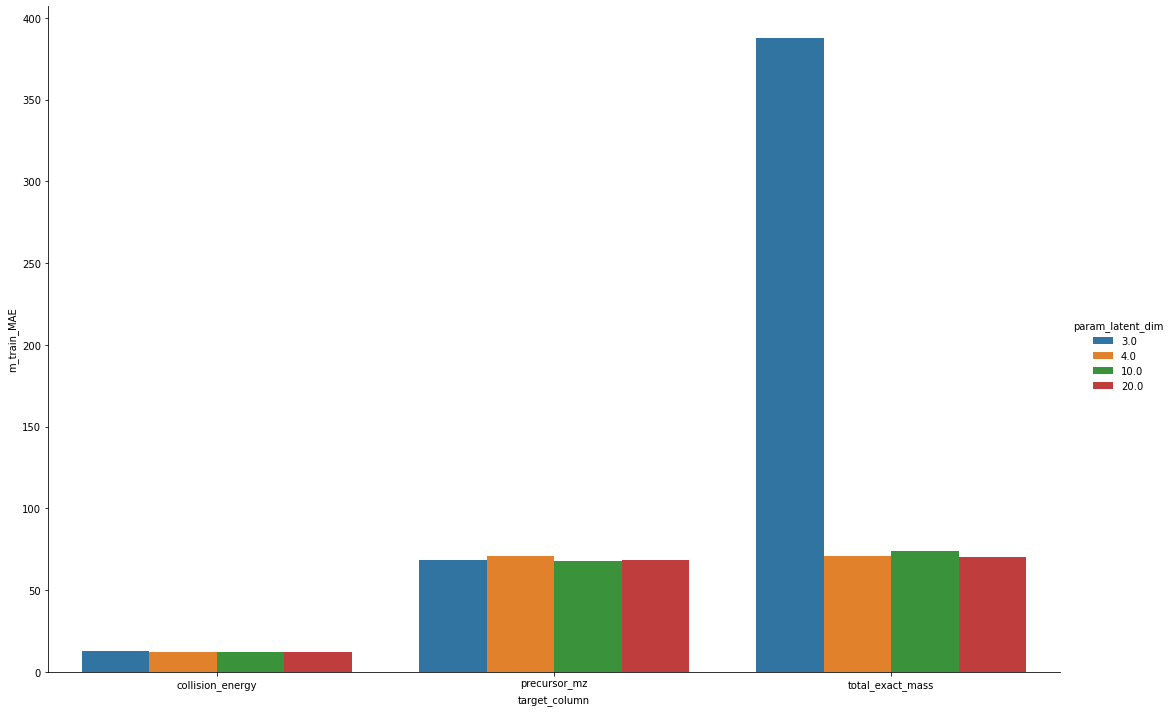

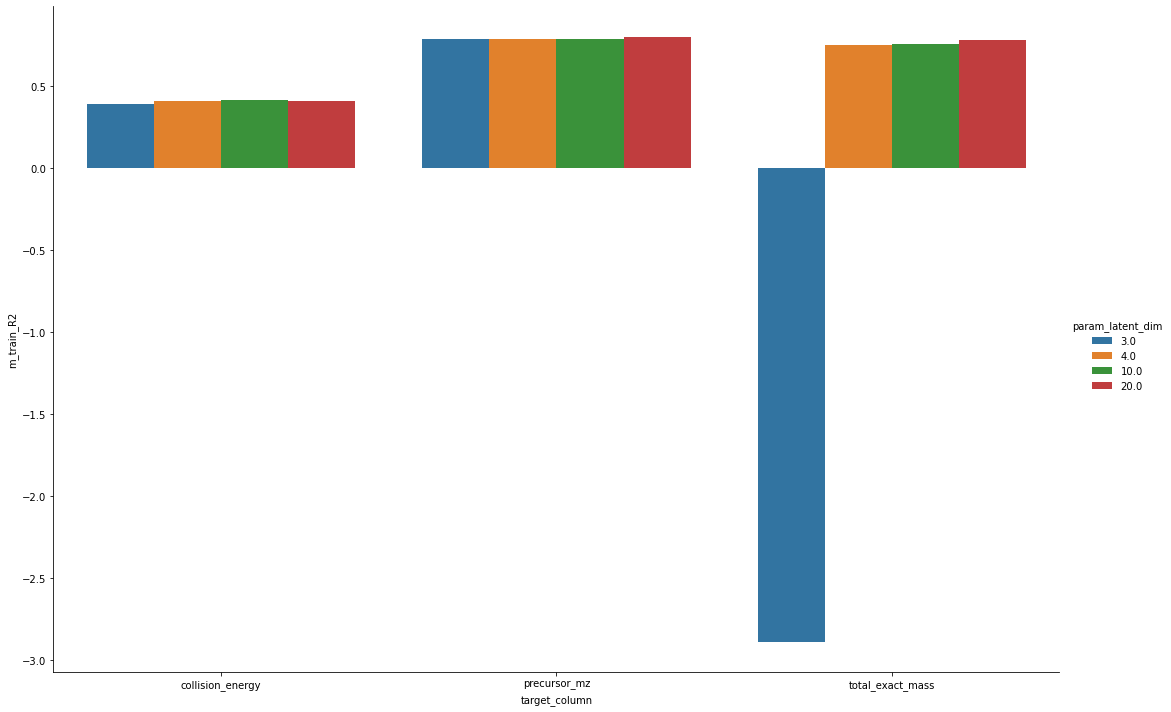

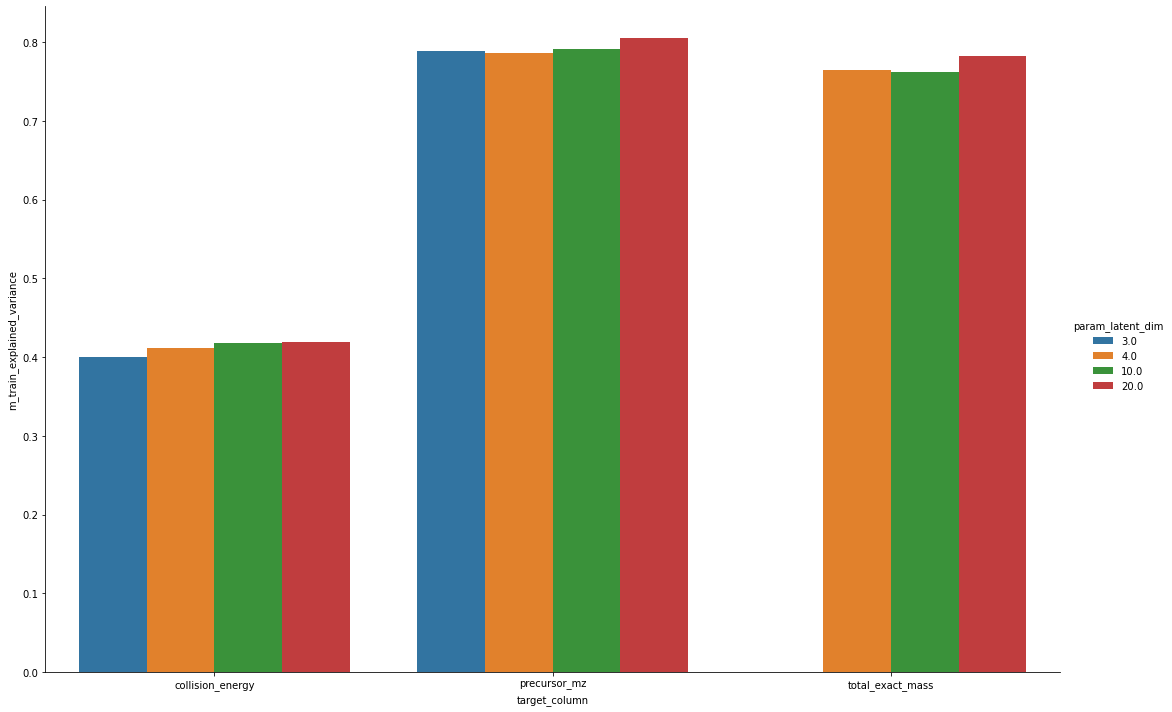

In [102]:
df_ = df[(df['name'] == 'betavae_reg_latent') & \
            (df['dataset'] == dataset) & \
            (df['param_max_num_peaks'] == 50) & \
            (df['param_min_intensity'] == 0.001) & \
            (df['param_rescale_intensity'] == False) & \
            (df['param_beta'] == 0.01)
        ]
for column in reg_scores:
    ax = sns.catplot(data=df_, x="target_column", y=column,
            hue="param_latent_dim", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)
    plt.savefig(f'../.img/{dataset}-reg-latent-dim-{column}.svg')